In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 数据读取预处理
### 需要修改日期和保存图片名称

In [2]:
pjme = pd.read_csv('final_model.csv', index_col=[0], parse_dates=[0])
feature = list(pjme.columns)

split_date = '2021-06-26'
test_end_date = '2021-09-24'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.iloc[(pjme.index > split_date) & (pjme.index <= test_end_date)].copy()
df_empty = pjme_test.copy()

result = pd.DataFrame(pjme_test, columns=['ds', 'CASHING_SUM'])
result['ds'] = result.index

## 单个feature预测自己未来90天数据
### train data只有日期和feature自己
### 函数名称和后面的create_features不同

In [3]:
def week_of_month(date_value):
    return (date_value.isocalendar()[1] - date_value.replace(day=1).isocalendar()[1] + 1)

In [4]:
def create_feature(df, label=None):
    df['date'] = df.index # index: DatetimeIndex
    df['day_of_week'] = df['date'].dt.dayofweek.values
    df['quarter'] = df['date'].dt.quarter.values
    df['month'] = df['date'].dt.month.values
    df['year'] = df['date'].dt.year.values
    df['day_of_year'] = df['date'].dt.dayofyear.values
    df['day_of_month'] = df['date'].dt.day.values
    df['week_of_year'] = df['date'].dt.weekofyear.values
    df['week_of_month'] = df.apply(lambda x: week_of_month(x.date), axis = 1)

    X = df[['day_of_week', 'quarter', 'month', 'year', 'day_of_year', 'day_of_month', 'week_of_year','week_of_month','holiday']]
    if label:
        y = df[label]
        return X, y
    return X

In [5]:
def pred_feature(i,df_empty,MSE,RMSE,MAE,MAPE):
    # 训练集
    X_train, y_train = create_feature(pjme_train, label=i)
    # 测试集
    X_test, y_test = create_feature(pjme_test, label=i)# 模型
    
    reg = xgb.XGBRegressor(n_estimators=1000)
    # 训练
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50)
    #y_pred
    y_pred = reg.predict(X_test)
    #计算误差
    MSE.append(np.mean(np.square(y_test - y_pred)))
    RMSE.append(np.sqrt(np.mean(np.square(y_test - y_pred))))
    MAE.append(np.mean(np.abs(y_test - y_pred)))
    MAPE.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    
    df_empty[i] = y_pred
    return(df_empty,MSE,RMSE,MAE,MAPE)

## 分别计算91个feature，并将每一列的预测都并入df_empty
### 所有误差都进入下述4个list

In [6]:
MSE = []
RMSE = []
MAE = []
MAPE = []

for i in feature:
    if i == 'holiday':
        continue
    else:
        df_empty,MSE,RMSE,MAE,MAPE = pred_feature(i,df_empty,MSE,RMSE,MAE,MAPE)

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:1573.02576	validation_1-rmse:1216.80188
[1]	validation_0-rmse:1153.75696	validation_1-rmse:883.99207
[2]	validation_0-rmse:865.92651	validation_1-rmse:649.46069
[3]	validation_0-rmse:670.67847	validation_1-rmse:489.97965
[4]	validation_0-rmse:533.47961	validation_1-rmse:390.98331
[5]	validation_0-rmse:437.46033	validation_1-rmse:337.08789
[6]	validation_0-rmse:372.07361	validation_1-rmse:306.28683
[7]	validation_0-rmse:322.37436	validation_1-rmse:297.98251
[8]	validation_0-rmse:289.52945	validation_1-rmse:287.11542
[9]	validation_0-rmse:265.83203	validation_1-rmse:283.71851
[10]	validation_0-rmse:248.13553	validation_1-rmse:276.57321
[11]	validation_0-rmse:230.67419	validation_1-rmse:265.31348
[12]	validation_0-rmse:220.99219	validation_1-rmse:264.84177
[13]	validation_0-rmse:208.00003	validation_1-rmse:259.22778
[14]	validation_0-rmse:196.93245	validation_1-rmse:252.95418
[15]	validation_0-rmse:182.71283	validation_1-rmse:255.50623
[16]	validation_0-rmse:174.7211

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:19.58258	validation_1-rmse:15.83478
[1]	validation_0-rmse:14.71209	validation_1-rmse:12.14781
[2]	validation_0-rmse:11.44543	validation_1-rmse:9.35948
[3]	validation_0-rmse:9.23784	validation_1-rmse:7.92036
[4]	validation_0-rmse:7.85164	validation_1-rmse:6.87561
[5]	validation_0-rmse:6.88149	validation_1-rmse:6.45780
[6]	validation_0-rmse:6.13972	validation_1-rmse:6.16971
[7]	validation_0-rmse:5.72940	validation_1-rmse:5.97883
[8]	validation_0-rmse:5.44644	validation_1-rmse:5.75006
[9]	validation_0-rmse:5.19018	validation_1-rmse:5.64602
[10]	validation_0-rmse:4.96073	validation_1-rmse:5.67009
[11]	validation_0-rmse:4.77617	validation_1-rmse:5.66569
[12]	validation_0-rmse:4.64797	validation_1-rmse:5.67184
[13]	validation_0-rmse:4.47128	validation_1-rmse:5.69157
[14]	validation_0-rmse:4.34778	validation_1-rmse:5.66138
[15]	validation_0-rmse:4.27576	validation_1-rmse:5.64155
[16]	validation_0-rmse:4.14249	validation_1-rmse:5.64161
[17]	validation_0-rmse:4.04603	valid

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:2137.03540	validation_1-rmse:1672.55041
[1]	validation_0-rmse:1568.83777	validation_1-rmse:1210.56335
[2]	validation_0-rmse:1180.18225	validation_1-rmse:897.30786
[3]	validation_0-rmse:911.00006	validation_1-rmse:696.01324
[4]	validation_0-rmse:730.60846	validation_1-rmse:566.49762
[5]	validation_0-rmse:605.53589	validation_1-rmse:483.61127
[6]	validation_0-rmse:528.73053	validation_1-rmse:433.06378
[7]	validation_0-rmse:445.53220	validation_1-rmse:411.94116
[8]	validation_0-rmse:401.26309	validation_1-rmse:400.53589
[9]	validation_0-rmse:373.47070	validation_1-rmse:396.47266
[10]	validation_0-rmse:348.08621	validation_1-rmse:389.27197
[11]	validation_0-rmse:330.42291	validation_1-rmse:377.34399
[12]	validation_0-rmse:320.07367	validation_1-rmse:372.32935
[13]	validation_0-rmse:293.87308	validation_1-rmse:366.84839
[14]	validation_0-rmse:284.80731	validation_1-rmse:361.36734
[15]	validation_0-rmse:265.70972	validation_1-rmse:362.59497
[16]	validation_0-rmse:256.57

[136]	validation_0-rmse:32.53072	validation_1-rmse:300.08868
[137]	validation_0-rmse:32.36780	validation_1-rmse:300.08859
[138]	validation_0-rmse:32.11160	validation_1-rmse:300.38117
[139]	validation_0-rmse:31.44727	validation_1-rmse:300.47971
[140]	validation_0-rmse:31.24028	validation_1-rmse:300.39728
[141]	validation_0-rmse:30.82683	validation_1-rmse:300.46637
[142]	validation_0-rmse:30.63755	validation_1-rmse:300.53052
[143]	validation_0-rmse:30.50358	validation_1-rmse:300.44537
[144]	validation_0-rmse:30.25426	validation_1-rmse:300.26959
[145]	validation_0-rmse:30.09403	validation_1-rmse:300.38946
[146]	validation_0-rmse:29.88250	validation_1-rmse:300.43442
[147]	validation_0-rmse:29.73976	validation_1-rmse:300.42926
[148]	validation_0-rmse:29.54491	validation_1-rmse:300.42938
[149]	validation_0-rmse:29.47762	validation_1-rmse:300.42908
[150]	validation_0-rmse:29.45513	validation_1-rmse:300.42935
[151]	validation_0-rmse:29.26925	validation_1-rmse:300.39670
[152]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:2218.97583	validation_1-rmse:1713.59814
[1]	validation_0-rmse:1626.83069	validation_1-rmse:1253.69409
[2]	validation_0-rmse:1218.31580	validation_1-rmse:960.51410
[3]	validation_0-rmse:941.04016	validation_1-rmse:731.68549
[4]	validation_0-rmse:747.14258	validation_1-rmse:565.66461
[5]	validation_0-rmse:619.14569	validation_1-rmse:481.46939
[6]	validation_0-rmse:530.98230	validation_1-rmse:406.58279
[7]	validation_0-rmse:472.58746	validation_1-rmse:395.10941
[8]	validation_0-rmse:429.11243	validation_1-rmse:363.77817
[9]	validation_0-rmse:390.28738	validation_1-rmse:340.78726
[10]	validation_0-rmse:350.98352	validation_1-rmse:340.29208
[11]	validation_0-rmse:329.23721	validation_1-rmse:342.08011
[12]	validation_0-rmse:316.46750	validation_1-rmse:346.57098
[13]	validation_0-rmse:292.75586	validation_1-rmse:353.22229
[14]	validation_0-rmse:283.19287	validation_1-rmse:353.58658
[15]	validation_0-rmse:271.35626	validation_1-rmse:348.81186
[16]	validation_0-rmse:256.24

[136]	validation_0-rmse:34.93688	validation_1-rmse:307.43121
[137]	validation_0-rmse:34.52673	validation_1-rmse:307.45392
[138]	validation_0-rmse:34.14672	validation_1-rmse:307.96875
[139]	validation_0-rmse:33.58354	validation_1-rmse:308.07703
[140]	validation_0-rmse:33.48146	validation_1-rmse:308.04483
[141]	validation_0-rmse:33.36941	validation_1-rmse:308.04950
[142]	validation_0-rmse:33.17388	validation_1-rmse:311.13174
[143]	validation_0-rmse:32.85207	validation_1-rmse:311.49332
[144]	validation_0-rmse:32.65668	validation_1-rmse:311.43716
[145]	validation_0-rmse:32.47485	validation_1-rmse:311.68240
[146]	validation_0-rmse:32.16321	validation_1-rmse:311.71243
[147]	validation_0-rmse:31.70011	validation_1-rmse:311.82364
[148]	validation_0-rmse:31.45422	validation_1-rmse:311.98978
[149]	validation_0-rmse:31.11333	validation_1-rmse:312.11859
[150]	validation_0-rmse:31.03355	validation_1-rmse:312.17017
[151]	validation_0-rmse:30.71182	validation_1-rmse:312.28812
[152]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:1490.80383	validation_1-rmse:1143.15808
[1]	validation_0-rmse:1096.90698	validation_1-rmse:826.07178
[2]	validation_0-rmse:828.75641	validation_1-rmse:600.70685
[3]	validation_0-rmse:644.94769	validation_1-rmse:458.68066
[4]	validation_0-rmse:513.69836	validation_1-rmse:369.59238
[5]	validation_0-rmse:429.36096	validation_1-rmse:321.62100
[6]	validation_0-rmse:363.79639	validation_1-rmse:277.47723
[7]	validation_0-rmse:322.49435	validation_1-rmse:257.94977
[8]	validation_0-rmse:294.91806	validation_1-rmse:250.65695
[9]	validation_0-rmse:271.28281	validation_1-rmse:246.54738
[10]	validation_0-rmse:256.40301	validation_1-rmse:246.28241
[11]	validation_0-rmse:229.21458	validation_1-rmse:250.26117
[12]	validation_0-rmse:211.29244	validation_1-rmse:240.38785
[13]	validation_0-rmse:201.36131	validation_1-rmse:236.64653
[14]	validation_0-rmse:194.60605	validation_1-rmse:236.11812
[15]	validation_0-rmse:179.72974	validation_1-rmse:239.80437
[16]	validation_0-rmse:173.4603

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:499.43845	validation_1-rmse:388.96585
[1]	validation_0-rmse:366.26010	validation_1-rmse:288.38904
[2]	validation_0-rmse:274.83578	validation_1-rmse:221.79970
[3]	validation_0-rmse:212.83691	validation_1-rmse:166.06361
[4]	validation_0-rmse:169.75484	validation_1-rmse:139.55543
[5]	validation_0-rmse:141.18749	validation_1-rmse:116.99041
[6]	validation_0-rmse:119.13263	validation_1-rmse:104.03272
[7]	validation_0-rmse:105.64514	validation_1-rmse:94.15484
[8]	validation_0-rmse:92.81051	validation_1-rmse:87.91546
[9]	validation_0-rmse:83.83790	validation_1-rmse:82.08493
[10]	validation_0-rmse:78.74574	validation_1-rmse:81.27944
[11]	validation_0-rmse:73.43493	validation_1-rmse:81.37312
[12]	validation_0-rmse:69.43030	validation_1-rmse:80.42876
[13]	validation_0-rmse:67.05314	validation_1-rmse:81.00888
[14]	validation_0-rmse:64.30734	validation_1-rmse:79.24339
[15]	validation_0-rmse:61.65013	validation_1-rmse:77.30715
[16]	validation_0-rmse:57.85412	validation_1-rmse:7

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:135.79654	validation_1-rmse:106.48106
[1]	validation_0-rmse:99.97923	validation_1-rmse:77.62501
[2]	validation_0-rmse:75.84279	validation_1-rmse:55.92445
[3]	validation_0-rmse:59.39143	validation_1-rmse:42.61456
[4]	validation_0-rmse:47.84198	validation_1-rmse:36.20515
[5]	validation_0-rmse:39.65759	validation_1-rmse:30.49708
[6]	validation_0-rmse:34.24593	validation_1-rmse:29.23829
[7]	validation_0-rmse:30.85412	validation_1-rmse:28.00060
[8]	validation_0-rmse:27.43725	validation_1-rmse:27.44168
[9]	validation_0-rmse:25.81486	validation_1-rmse:26.89675
[10]	validation_0-rmse:24.39002	validation_1-rmse:26.48211
[11]	validation_0-rmse:23.44351	validation_1-rmse:25.73357
[12]	validation_0-rmse:21.71455	validation_1-rmse:25.15951
[13]	validation_0-rmse:20.99154	validation_1-rmse:25.11404
[14]	validation_0-rmse:19.86216	validation_1-rmse:25.06486
[15]	validation_0-rmse:19.21487	validation_1-rmse:24.64898
[16]	validation_0-rmse:18.44099	validation_1-rmse:24.25247
[17]	

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:3138.67383	validation_1-rmse:2430.13330
[1]	validation_0-rmse:2300.30249	validation_1-rmse:1777.53381
[2]	validation_0-rmse:1728.49304	validation_1-rmse:1359.56726
[3]	validation_0-rmse:1341.02563	validation_1-rmse:1098.35815
[4]	validation_0-rmse:1069.72925	validation_1-rmse:862.77765
[5]	validation_0-rmse:890.90967	validation_1-rmse:704.35620
[6]	validation_0-rmse:756.57538	validation_1-rmse:643.41620
[7]	validation_0-rmse:672.66986	validation_1-rmse:576.93762
[8]	validation_0-rmse:589.17615	validation_1-rmse:569.91644
[9]	validation_0-rmse:534.01349	validation_1-rmse:536.31824
[10]	validation_0-rmse:502.05914	validation_1-rmse:519.09888
[11]	validation_0-rmse:474.74780	validation_1-rmse:500.79721
[12]	validation_0-rmse:435.54858	validation_1-rmse:497.32642
[13]	validation_0-rmse:416.68906	validation_1-rmse:505.42929
[14]	validation_0-rmse:393.15106	validation_1-rmse:504.65308
[15]	validation_0-rmse:376.22000	validation_1-rmse:502.66699
[16]	validation_0-rmse:36

[135]	validation_0-rmse:46.07486	validation_1-rmse:442.01440
[136]	validation_0-rmse:45.70243	validation_1-rmse:441.76303
[137]	validation_0-rmse:45.03472	validation_1-rmse:441.74240
[138]	validation_0-rmse:44.84911	validation_1-rmse:441.74005
[139]	validation_0-rmse:44.27329	validation_1-rmse:441.73615
[140]	validation_0-rmse:43.87775	validation_1-rmse:441.61484
[141]	validation_0-rmse:43.67887	validation_1-rmse:441.61456
[142]	validation_0-rmse:43.40616	validation_1-rmse:441.61243
[143]	validation_0-rmse:42.96925	validation_1-rmse:441.61450
[144]	validation_0-rmse:42.69219	validation_1-rmse:441.61331
[145]	validation_0-rmse:42.25098	validation_1-rmse:441.63361
[146]	validation_0-rmse:41.73334	validation_1-rmse:441.72180
[147]	validation_0-rmse:41.48665	validation_1-rmse:440.44241
[148]	validation_0-rmse:41.10822	validation_1-rmse:440.46094
[149]	validation_0-rmse:40.58683	validation_1-rmse:440.63071
[150]	validation_0-rmse:40.05147	validation_1-rmse:440.75211
[151]	validation_0-rmse:

[270]	validation_0-rmse:13.23403	validation_1-rmse:438.56772
[271]	validation_0-rmse:13.08530	validation_1-rmse:438.53867
[272]	validation_0-rmse:13.06107	validation_1-rmse:438.53894
[273]	validation_0-rmse:12.88074	validation_1-rmse:438.64444
[274]	validation_0-rmse:12.83104	validation_1-rmse:438.66022
[275]	validation_0-rmse:12.71588	validation_1-rmse:438.66043
[276]	validation_0-rmse:12.63754	validation_1-rmse:438.70517
[277]	validation_0-rmse:12.39663	validation_1-rmse:438.70538
[278]	validation_0-rmse:12.21895	validation_1-rmse:438.72201
[279]	validation_0-rmse:12.08170	validation_1-rmse:438.66730
[280]	validation_0-rmse:11.96769	validation_1-rmse:438.67584
[281]	validation_0-rmse:11.94627	validation_1-rmse:438.67480
[282]	validation_0-rmse:11.87723	validation_1-rmse:438.67505
[283]	validation_0-rmse:11.80713	validation_1-rmse:438.67181
[284]	validation_0-rmse:11.64739	validation_1-rmse:438.74341
[285]	validation_0-rmse:11.52314	validation_1-rmse:438.74966
[286]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:937.42053	validation_1-rmse:725.91431
[1]	validation_0-rmse:687.49463	validation_1-rmse:531.32806
[2]	validation_0-rmse:515.67169	validation_1-rmse:402.59476
[3]	validation_0-rmse:400.87283	validation_1-rmse:320.00003
[4]	validation_0-rmse:322.88849	validation_1-rmse:267.35953
[5]	validation_0-rmse:267.82944	validation_1-rmse:211.78798
[6]	validation_0-rmse:224.61085	validation_1-rmse:192.05855
[7]	validation_0-rmse:198.50813	validation_1-rmse:172.37143
[8]	validation_0-rmse:179.48468	validation_1-rmse:166.64133
[9]	validation_0-rmse:166.01028	validation_1-rmse:164.16177
[10]	validation_0-rmse:152.08469	validation_1-rmse:154.48700
[11]	validation_0-rmse:144.10069	validation_1-rmse:150.35176
[12]	validation_0-rmse:132.73627	validation_1-rmse:149.38057
[13]	validation_0-rmse:123.01135	validation_1-rmse:142.74533
[14]	validation_0-rmse:117.58791	validation_1-rmse:146.14653
[15]	validation_0-rmse:112.26128	validation_1-rmse:144.58611
[16]	validation_0-rmse:107.92021	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:3997.50781	validation_1-rmse:3083.60352
[1]	validation_0-rmse:2940.04224	validation_1-rmse:2232.70239
[2]	validation_0-rmse:2215.39209	validation_1-rmse:1685.88318
[3]	validation_0-rmse:1708.83569	validation_1-rmse:1249.57275
[4]	validation_0-rmse:1365.30640	validation_1-rmse:1070.15039
[5]	validation_0-rmse:1130.96375	validation_1-rmse:844.65356
[6]	validation_0-rmse:955.67011	validation_1-rmse:759.24817
[7]	validation_0-rmse:836.30933	validation_1-rmse:721.69891
[8]	validation_0-rmse:768.38745	validation_1-rmse:680.93909
[9]	validation_0-rmse:713.72986	validation_1-rmse:659.85736
[10]	validation_0-rmse:673.23138	validation_1-rmse:647.32495
[11]	validation_0-rmse:609.85876	validation_1-rmse:649.11523
[12]	validation_0-rmse:582.59699	validation_1-rmse:642.32782
[13]	validation_0-rmse:545.47846	validation_1-rmse:647.18933
[14]	validation_0-rmse:525.83423	validation_1-rmse:636.08588
[15]	validation_0-rmse:505.91544	validation_1-rmse:633.95935
[16]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:922.35724	validation_1-rmse:711.76038
[1]	validation_0-rmse:676.33502	validation_1-rmse:524.59033
[2]	validation_0-rmse:505.55664	validation_1-rmse:398.34006
[3]	validation_0-rmse:390.34717	validation_1-rmse:291.47473
[4]	validation_0-rmse:312.01025	validation_1-rmse:240.45926
[5]	validation_0-rmse:257.32358	validation_1-rmse:195.45102
[6]	validation_0-rmse:222.84312	validation_1-rmse:174.40793
[7]	validation_0-rmse:191.84537	validation_1-rmse:162.60477
[8]	validation_0-rmse:174.28485	validation_1-rmse:156.16226
[9]	validation_0-rmse:160.33914	validation_1-rmse:151.53537
[10]	validation_0-rmse:149.13992	validation_1-rmse:148.71291
[11]	validation_0-rmse:136.95929	validation_1-rmse:149.61832
[12]	validation_0-rmse:130.34090	validation_1-rmse:149.30788
[13]	validation_0-rmse:122.01846	validation_1-rmse:148.85068
[14]	validation_0-rmse:118.75752	validation_1-rmse:151.27052
[15]	validation_0-rmse:110.70240	validation_1-rmse:148.24803
[16]	validation_0-rmse:103.03833	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:423.75931	validation_1-rmse:329.24506
[1]	validation_0-rmse:312.44257	validation_1-rmse:237.68205
[2]	validation_0-rmse:235.72685	validation_1-rmse:176.09778
[3]	validation_0-rmse:183.82831	validation_1-rmse:136.15137
[4]	validation_0-rmse:145.91370	validation_1-rmse:101.47814
[5]	validation_0-rmse:120.12873	validation_1-rmse:91.73937
[6]	validation_0-rmse:103.35362	validation_1-rmse:78.78655
[7]	validation_0-rmse:92.15702	validation_1-rmse:78.77132
[8]	validation_0-rmse:83.81495	validation_1-rmse:69.91283
[9]	validation_0-rmse:77.03433	validation_1-rmse:68.24297
[10]	validation_0-rmse:69.09800	validation_1-rmse:67.47454
[11]	validation_0-rmse:65.77306	validation_1-rmse:66.63151
[12]	validation_0-rmse:60.65644	validation_1-rmse:67.05706
[13]	validation_0-rmse:58.78313	validation_1-rmse:67.48351
[14]	validation_0-rmse:55.49738	validation_1-rmse:67.05072
[15]	validation_0-rmse:54.34841	validation_1-rmse:67.19170
[16]	validation_0-rmse:52.41714	validation_1-rmse:66.0

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:2984.91211	validation_1-rmse:2297.02637
[1]	validation_0-rmse:2187.33325	validation_1-rmse:1689.35242
[2]	validation_0-rmse:1642.74109	validation_1-rmse:1283.41406
[3]	validation_0-rmse:1267.48486	validation_1-rmse:903.60553
[4]	validation_0-rmse:1011.30866	validation_1-rmse:706.65314
[5]	validation_0-rmse:818.75415	validation_1-rmse:628.54944
[6]	validation_0-rmse:698.59491	validation_1-rmse:561.71747
[7]	validation_0-rmse:618.48871	validation_1-rmse:561.16077
[8]	validation_0-rmse:561.44183	validation_1-rmse:559.93445
[9]	validation_0-rmse:523.56757	validation_1-rmse:557.13544
[10]	validation_0-rmse:470.02035	validation_1-rmse:540.35828
[11]	validation_0-rmse:447.77564	validation_1-rmse:552.56311
[12]	validation_0-rmse:430.67120	validation_1-rmse:566.10413
[13]	validation_0-rmse:400.41495	validation_1-rmse:544.44501
[14]	validation_0-rmse:386.31143	validation_1-rmse:532.46533
[15]	validation_0-rmse:366.83676	validation_1-rmse:523.21503
[16]	validation_0-rmse:354

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:3009.52466	validation_1-rmse:2357.31909
[1]	validation_0-rmse:2209.55591	validation_1-rmse:1708.11975
[2]	validation_0-rmse:1666.52271	validation_1-rmse:1244.47046
[3]	validation_0-rmse:1291.56641	validation_1-rmse:981.19519
[4]	validation_0-rmse:1029.08826	validation_1-rmse:762.82538
[5]	validation_0-rmse:827.71558	validation_1-rmse:676.78497
[6]	validation_0-rmse:711.87506	validation_1-rmse:566.84308
[7]	validation_0-rmse:622.25562	validation_1-rmse:533.89752
[8]	validation_0-rmse:543.36749	validation_1-rmse:523.82355
[9]	validation_0-rmse:499.94159	validation_1-rmse:500.51401
[10]	validation_0-rmse:470.08795	validation_1-rmse:496.44894
[11]	validation_0-rmse:431.43838	validation_1-rmse:481.15625
[12]	validation_0-rmse:405.66010	validation_1-rmse:485.87378
[13]	validation_0-rmse:387.89606	validation_1-rmse:478.36487
[14]	validation_0-rmse:377.28116	validation_1-rmse:475.28561
[15]	validation_0-rmse:354.07312	validation_1-rmse:472.28918
[16]	validation_0-rmse:340

[135]	validation_0-rmse:54.30833	validation_1-rmse:409.93176
[136]	validation_0-rmse:53.53535	validation_1-rmse:409.90832
[137]	validation_0-rmse:53.06308	validation_1-rmse:409.58130
[138]	validation_0-rmse:52.65768	validation_1-rmse:409.68280
[139]	validation_0-rmse:51.90482	validation_1-rmse:410.97064
[140]	validation_0-rmse:51.63352	validation_1-rmse:410.81186
[141]	validation_0-rmse:50.42915	validation_1-rmse:410.78616
[142]	validation_0-rmse:50.15094	validation_1-rmse:410.39920
[143]	validation_0-rmse:49.68496	validation_1-rmse:410.51828
[144]	validation_0-rmse:49.49408	validation_1-rmse:410.50131
[145]	validation_0-rmse:48.35874	validation_1-rmse:410.30225
[146]	validation_0-rmse:47.77598	validation_1-rmse:410.16394
[147]	validation_0-rmse:47.54727	validation_1-rmse:410.16214
[148]	validation_0-rmse:46.88131	validation_1-rmse:410.15814
[149]	validation_0-rmse:46.25930	validation_1-rmse:410.21817
[150]	validation_0-rmse:45.78478	validation_1-rmse:410.48648
[151]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:1531.29602	validation_1-rmse:1183.67200
[1]	validation_0-rmse:1125.03333	validation_1-rmse:857.52484
[2]	validation_0-rmse:847.35443	validation_1-rmse:648.62122
[3]	validation_0-rmse:655.79840	validation_1-rmse:506.10214
[4]	validation_0-rmse:523.60870	validation_1-rmse:426.97586
[5]	validation_0-rmse:435.11020	validation_1-rmse:369.41769
[6]	validation_0-rmse:370.34512	validation_1-rmse:321.46701
[7]	validation_0-rmse:329.10184	validation_1-rmse:302.46805
[8]	validation_0-rmse:296.90497	validation_1-rmse:287.22287
[9]	validation_0-rmse:268.15582	validation_1-rmse:280.31726
[10]	validation_0-rmse:244.33241	validation_1-rmse:271.25235
[11]	validation_0-rmse:231.24471	validation_1-rmse:262.51688
[12]	validation_0-rmse:213.66695	validation_1-rmse:259.79172
[13]	validation_0-rmse:196.37691	validation_1-rmse:250.99638
[14]	validation_0-rmse:188.04698	validation_1-rmse:251.81525
[15]	validation_0-rmse:182.30507	validation_1-rmse:253.80121
[16]	validation_0-rmse:172.8300

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:211.83615	validation_1-rmse:164.62689
[1]	validation_0-rmse:155.75598	validation_1-rmse:119.58498
[2]	validation_0-rmse:117.64815	validation_1-rmse:88.14368
[3]	validation_0-rmse:91.61217	validation_1-rmse:69.11501
[4]	validation_0-rmse:73.65686	validation_1-rmse:58.51380
[5]	validation_0-rmse:61.41363	validation_1-rmse:46.81555
[6]	validation_0-rmse:51.46534	validation_1-rmse:42.88035
[7]	validation_0-rmse:45.74909	validation_1-rmse:39.73607
[8]	validation_0-rmse:41.16591	validation_1-rmse:38.62287
[9]	validation_0-rmse:38.00764	validation_1-rmse:37.78846
[10]	validation_0-rmse:35.68255	validation_1-rmse:37.21842
[11]	validation_0-rmse:32.98835	validation_1-rmse:37.30401
[12]	validation_0-rmse:31.91784	validation_1-rmse:36.85225
[13]	validation_0-rmse:29.67061	validation_1-rmse:36.89927
[14]	validation_0-rmse:28.38470	validation_1-rmse:36.31398
[15]	validation_0-rmse:27.26369	validation_1-rmse:36.16472
[16]	validation_0-rmse:26.60869	validation_1-rmse:35.42261
[1

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:62.24608	validation_1-rmse:47.65454
[1]	validation_0-rmse:45.99255	validation_1-rmse:34.73025
[2]	validation_0-rmse:34.97046	validation_1-rmse:27.01279
[3]	validation_0-rmse:27.34539	validation_1-rmse:20.26133
[4]	validation_0-rmse:22.36899	validation_1-rmse:15.95851
[5]	validation_0-rmse:18.54999	validation_1-rmse:13.80490
[6]	validation_0-rmse:16.07500	validation_1-rmse:12.84440
[7]	validation_0-rmse:14.42649	validation_1-rmse:12.62320
[8]	validation_0-rmse:13.29541	validation_1-rmse:12.66540
[9]	validation_0-rmse:12.53445	validation_1-rmse:12.77248
[10]	validation_0-rmse:11.91081	validation_1-rmse:12.60247
[11]	validation_0-rmse:11.16089	validation_1-rmse:12.64645
[12]	validation_0-rmse:10.77423	validation_1-rmse:12.75789
[13]	validation_0-rmse:10.39183	validation_1-rmse:12.60903
[14]	validation_0-rmse:9.85935	validation_1-rmse:12.60361
[15]	validation_0-rmse:9.38297	validation_1-rmse:12.73472
[16]	validation_0-rmse:9.15069	validation_1-rmse:12.64730
[17]	valid

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:3164.54981	validation_1-rmse:2441.95117
[1]	validation_0-rmse:2327.37402	validation_1-rmse:1766.01196
[2]	validation_0-rmse:1753.86536	validation_1-rmse:1325.51465
[3]	validation_0-rmse:1350.40295	validation_1-rmse:978.86585
[4]	validation_0-rmse:1080.45825	validation_1-rmse:807.94739
[5]	validation_0-rmse:893.56158	validation_1-rmse:691.09271
[6]	validation_0-rmse:763.65051	validation_1-rmse:647.91547
[7]	validation_0-rmse:653.72803	validation_1-rmse:643.81103
[8]	validation_0-rmse:584.63238	validation_1-rmse:647.41168
[9]	validation_0-rmse:541.81311	validation_1-rmse:594.96814
[10]	validation_0-rmse:487.72794	validation_1-rmse:577.48395
[11]	validation_0-rmse:452.35913	validation_1-rmse:579.08398
[12]	validation_0-rmse:424.86624	validation_1-rmse:574.28229
[13]	validation_0-rmse:408.36456	validation_1-rmse:571.26965
[14]	validation_0-rmse:382.24734	validation_1-rmse:563.98438
[15]	validation_0-rmse:362.51508	validation_1-rmse:556.17664
[16]	validation_0-rmse:352

[135]	validation_0-rmse:47.55040	validation_1-rmse:506.62875
[136]	validation_0-rmse:47.36828	validation_1-rmse:506.72613
[137]	validation_0-rmse:46.86950	validation_1-rmse:506.72553
[138]	validation_0-rmse:46.57137	validation_1-rmse:506.73404
[139]	validation_0-rmse:46.13495	validation_1-rmse:506.48682
[140]	validation_0-rmse:45.41056	validation_1-rmse:506.99295
[141]	validation_0-rmse:45.22741	validation_1-rmse:506.38846
[142]	validation_0-rmse:44.89309	validation_1-rmse:506.39563
[143]	validation_0-rmse:44.67509	validation_1-rmse:506.38516
[144]	validation_0-rmse:44.60053	validation_1-rmse:506.39371
[145]	validation_0-rmse:44.10897	validation_1-rmse:506.41483
[146]	validation_0-rmse:43.63931	validation_1-rmse:506.43579
[147]	validation_0-rmse:42.60893	validation_1-rmse:506.21115
[148]	validation_0-rmse:42.17541	validation_1-rmse:506.33289
[149]	validation_0-rmse:41.33288	validation_1-rmse:506.08951
[150]	validation_0-rmse:40.94760	validation_1-rmse:506.00220
[151]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:918.84528	validation_1-rmse:715.28766
[1]	validation_0-rmse:673.84357	validation_1-rmse:525.61609
[2]	validation_0-rmse:506.35834	validation_1-rmse:397.83047
[3]	validation_0-rmse:390.93616	validation_1-rmse:319.45154
[4]	validation_0-rmse:311.89264	validation_1-rmse:236.71704
[5]	validation_0-rmse:258.92316	validation_1-rmse:198.14926
[6]	validation_0-rmse:218.63152	validation_1-rmse:179.30855
[7]	validation_0-rmse:195.40933	validation_1-rmse:172.88692
[8]	validation_0-rmse:170.80820	validation_1-rmse:167.77449
[9]	validation_0-rmse:158.76184	validation_1-rmse:161.67708
[10]	validation_0-rmse:149.70625	validation_1-rmse:158.84645
[11]	validation_0-rmse:137.91455	validation_1-rmse:148.76054
[12]	validation_0-rmse:127.45288	validation_1-rmse:150.21503
[13]	validation_0-rmse:124.67614	validation_1-rmse:147.89269
[14]	validation_0-rmse:119.03225	validation_1-rmse:146.69220
[15]	validation_0-rmse:111.93585	validation_1-rmse:147.33601
[16]	validation_0-rmse:104.84787	v

[136]	validation_0-rmse:16.62795	validation_1-rmse:127.57155
[137]	validation_0-rmse:16.42230	validation_1-rmse:127.53134
[138]	validation_0-rmse:16.32886	validation_1-rmse:127.40988
[139]	validation_0-rmse:16.22978	validation_1-rmse:127.43856
[140]	validation_0-rmse:16.13699	validation_1-rmse:127.32714
[141]	validation_0-rmse:16.10511	validation_1-rmse:127.32954
[142]	validation_0-rmse:16.00891	validation_1-rmse:127.32399
[143]	validation_0-rmse:15.87321	validation_1-rmse:127.15444
[144]	validation_0-rmse:15.77068	validation_1-rmse:127.14912
[145]	validation_0-rmse:15.63318	validation_1-rmse:127.15058


/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:2393.43164	validation_1-rmse:1853.89917
[1]	validation_0-rmse:1754.38367	validation_1-rmse:1360.04199
[2]	validation_0-rmse:1313.82459	validation_1-rmse:1042.38013
[3]	validation_0-rmse:1013.68158	validation_1-rmse:813.79077
[4]	validation_0-rmse:803.21185	validation_1-rmse:631.24414
[5]	validation_0-rmse:661.28247	validation_1-rmse:525.26324
[6]	validation_0-rmse:568.13373	validation_1-rmse:491.41586
[7]	validation_0-rmse:499.96332	validation_1-rmse:441.35925
[8]	validation_0-rmse:454.28686	validation_1-rmse:428.64188
[9]	validation_0-rmse:417.99579	validation_1-rmse:414.35773
[10]	validation_0-rmse:387.78299	validation_1-rmse:411.55881
[11]	validation_0-rmse:370.07459	validation_1-rmse:411.24399
[12]	validation_0-rmse:354.45261	validation_1-rmse:415.88126
[13]	validation_0-rmse:323.37872	validation_1-rmse:397.71970
[14]	validation_0-rmse:312.64389	validation_1-rmse:399.54907
[15]	validation_0-rmse:292.52475	validation_1-rmse:391.99454
[16]	validation_0-rmse:271.

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:954.32806	validation_1-rmse:737.57739
[1]	validation_0-rmse:699.64941	validation_1-rmse:543.78711
[2]	validation_0-rmse:525.51691	validation_1-rmse:393.15927
[3]	validation_0-rmse:405.73386	validation_1-rmse:316.43420
[4]	validation_0-rmse:325.80063	validation_1-rmse:250.32237
[5]	validation_0-rmse:269.32736	validation_1-rmse:213.69019
[6]	validation_0-rmse:226.24200	validation_1-rmse:198.39438
[7]	validation_0-rmse:194.90781	validation_1-rmse:186.62065
[8]	validation_0-rmse:175.07036	validation_1-rmse:177.92288
[9]	validation_0-rmse:160.90158	validation_1-rmse:176.12096
[10]	validation_0-rmse:150.38185	validation_1-rmse:171.30688
[11]	validation_0-rmse:142.17020	validation_1-rmse:168.27959
[12]	validation_0-rmse:136.81535	validation_1-rmse:163.93944
[13]	validation_0-rmse:126.58439	validation_1-rmse:165.45648
[14]	validation_0-rmse:121.47015	validation_1-rmse:161.40366
[15]	validation_0-rmse:115.77293	validation_1-rmse:158.29465
[16]	validation_0-rmse:113.21050	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:369.01504	validation_1-rmse:281.97122
[1]	validation_0-rmse:271.19946	validation_1-rmse:204.40036
[2]	validation_0-rmse:204.63211	validation_1-rmse:154.80534
[3]	validation_0-rmse:158.56782	validation_1-rmse:122.26413
[4]	validation_0-rmse:127.17725	validation_1-rmse:106.85832
[5]	validation_0-rmse:105.68451	validation_1-rmse:91.03682
[6]	validation_0-rmse:90.38126	validation_1-rmse:79.10208
[7]	validation_0-rmse:78.09336	validation_1-rmse:72.76120
[8]	validation_0-rmse:71.68194	validation_1-rmse:67.81043
[9]	validation_0-rmse:67.12539	validation_1-rmse:66.59190
[10]	validation_0-rmse:60.71114	validation_1-rmse:66.38655
[11]	validation_0-rmse:56.64310	validation_1-rmse:66.09941
[12]	validation_0-rmse:52.84241	validation_1-rmse:62.98916
[13]	validation_0-rmse:49.45330	validation_1-rmse:62.79618
[14]	validation_0-rmse:47.91609	validation_1-rmse:62.03096
[15]	validation_0-rmse:45.18123	validation_1-rmse:61.24210
[16]	validation_0-rmse:43.41664	validation_1-rmse:60.83

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:2108.08691	validation_1-rmse:1632.95349
[1]	validation_0-rmse:1544.80164	validation_1-rmse:1197.65015
[2]	validation_0-rmse:1162.42090	validation_1-rmse:911.82886
[3]	validation_0-rmse:898.43341	validation_1-rmse:704.32410
[4]	validation_0-rmse:718.89441	validation_1-rmse:563.61859
[5]	validation_0-rmse:594.21204	validation_1-rmse:506.82443
[6]	validation_0-rmse:503.54153	validation_1-rmse:443.78598
[7]	validation_0-rmse:447.59491	validation_1-rmse:412.15231
[8]	validation_0-rmse:405.52139	validation_1-rmse:417.41016
[9]	validation_0-rmse:366.12753	validation_1-rmse:404.06451
[10]	validation_0-rmse:342.24948	validation_1-rmse:384.49069
[11]	validation_0-rmse:323.45889	validation_1-rmse:376.85800
[12]	validation_0-rmse:305.55557	validation_1-rmse:370.55719
[13]	validation_0-rmse:287.92682	validation_1-rmse:371.42154
[14]	validation_0-rmse:274.63687	validation_1-rmse:368.89191
[15]	validation_0-rmse:263.56741	validation_1-rmse:360.81912
[16]	validation_0-rmse:249.44

[136]	validation_0-rmse:34.31131	validation_1-rmse:315.81811
[137]	validation_0-rmse:34.05191	validation_1-rmse:315.78363
[138]	validation_0-rmse:33.63540	validation_1-rmse:315.78232
[139]	validation_0-rmse:33.34029	validation_1-rmse:315.72928
[140]	validation_0-rmse:32.96126	validation_1-rmse:315.58499
[141]	validation_0-rmse:32.84376	validation_1-rmse:315.58676
[142]	validation_0-rmse:32.81778	validation_1-rmse:315.58643
[143]	validation_0-rmse:32.38654	validation_1-rmse:315.92627
[144]	validation_0-rmse:32.24940	validation_1-rmse:315.91849
[145]	validation_0-rmse:31.90915	validation_1-rmse:314.43222
[146]	validation_0-rmse:31.64357	validation_1-rmse:314.43048
[147]	validation_0-rmse:31.28128	validation_1-rmse:314.63895
[148]	validation_0-rmse:30.78970	validation_1-rmse:315.21243
[149]	validation_0-rmse:30.44084	validation_1-rmse:315.55395
[150]	validation_0-rmse:30.38313	validation_1-rmse:315.62503
[151]	validation_0-rmse:29.88705	validation_1-rmse:315.62357
[152]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:152.15257	validation_1-rmse:116.21982
[1]	validation_0-rmse:112.23476	validation_1-rmse:83.84093
[2]	validation_0-rmse:85.03260	validation_1-rmse:63.12417
[3]	validation_0-rmse:66.64574	validation_1-rmse:48.89389
[4]	validation_0-rmse:53.65892	validation_1-rmse:41.68037
[5]	validation_0-rmse:44.36174	validation_1-rmse:36.12577
[6]	validation_0-rmse:37.93442	validation_1-rmse:33.47370
[7]	validation_0-rmse:33.88958	validation_1-rmse:32.29332
[8]	validation_0-rmse:29.85383	validation_1-rmse:33.03735
[9]	validation_0-rmse:27.74721	validation_1-rmse:32.96933
[10]	validation_0-rmse:26.12478	validation_1-rmse:32.80527
[11]	validation_0-rmse:24.86687	validation_1-rmse:32.91193
[12]	validation_0-rmse:23.14681	validation_1-rmse:33.78209
[13]	validation_0-rmse:22.56073	validation_1-rmse:33.90393
[14]	validation_0-rmse:21.35187	validation_1-rmse:34.43707
[15]	validation_0-rmse:20.23791	validation_1-rmse:34.21195
[16]	validation_0-rmse:19.58608	validation_1-rmse:33.58060
[17]

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:345.91943	validation_1-rmse:272.24301
[1]	validation_0-rmse:254.33228	validation_1-rmse:198.14554
[2]	validation_0-rmse:191.60730	validation_1-rmse:147.14929
[3]	validation_0-rmse:149.62418	validation_1-rmse:110.39284
[4]	validation_0-rmse:118.00846	validation_1-rmse:88.08066
[5]	validation_0-rmse:97.44342	validation_1-rmse:72.31690
[6]	validation_0-rmse:83.60600	validation_1-rmse:69.95029
[7]	validation_0-rmse:74.48069	validation_1-rmse:64.96854
[8]	validation_0-rmse:68.33008	validation_1-rmse:62.00911
[9]	validation_0-rmse:62.78421	validation_1-rmse:61.61787
[10]	validation_0-rmse:58.06744	validation_1-rmse:58.75747
[11]	validation_0-rmse:53.82687	validation_1-rmse:58.49445
[12]	validation_0-rmse:50.69385	validation_1-rmse:57.67301
[13]	validation_0-rmse:48.32805	validation_1-rmse:58.48577
[14]	validation_0-rmse:45.11582	validation_1-rmse:58.57652
[15]	validation_0-rmse:43.89972	validation_1-rmse:58.68339
[16]	validation_0-rmse:41.68112	validation_1-rmse:58.4476

[139]	validation_0-rmse:7.54828	validation_1-rmse:50.03270
[140]	validation_0-rmse:7.52512	validation_1-rmse:50.04472
[141]	validation_0-rmse:7.33066	validation_1-rmse:49.89529
[142]	validation_0-rmse:7.29799	validation_1-rmse:49.98218
[143]	validation_0-rmse:7.24781	validation_1-rmse:49.99112
[144]	validation_0-rmse:7.16540	validation_1-rmse:49.98195
[145]	validation_0-rmse:7.15857	validation_1-rmse:49.98723
[146]	validation_0-rmse:7.10510	validation_1-rmse:49.97583
[147]	validation_0-rmse:7.04692	validation_1-rmse:49.92267
[148]	validation_0-rmse:6.96985	validation_1-rmse:49.81457
[149]	validation_0-rmse:6.94519	validation_1-rmse:49.82454
[150]	validation_0-rmse:6.92583	validation_1-rmse:49.84860
[151]	validation_0-rmse:6.71610	validation_1-rmse:49.83457
[152]	validation_0-rmse:6.55972	validation_1-rmse:49.80306
[153]	validation_0-rmse:6.48675	validation_1-rmse:49.79866
[154]	validation_0-rmse:6.40679	validation_1-rmse:49.89916
[155]	validation_0-rmse:6.35725	validation_1-rmse:49.871

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:863.34363	validation_1-rmse:668.95868
[1]	validation_0-rmse:633.14014	validation_1-rmse:490.06918
[2]	validation_0-rmse:476.13907	validation_1-rmse:368.14133
[3]	validation_0-rmse:369.91275	validation_1-rmse:295.95496
[4]	validation_0-rmse:295.41318	validation_1-rmse:237.72861
[5]	validation_0-rmse:243.45190	validation_1-rmse:195.64690
[6]	validation_0-rmse:209.48326	validation_1-rmse:177.67844
[7]	validation_0-rmse:185.19014	validation_1-rmse:157.39418
[8]	validation_0-rmse:158.83340	validation_1-rmse:152.24611
[9]	validation_0-rmse:143.00584	validation_1-rmse:150.16951
[10]	validation_0-rmse:133.52690	validation_1-rmse:142.99793
[11]	validation_0-rmse:126.70366	validation_1-rmse:143.26364
[12]	validation_0-rmse:116.63401	validation_1-rmse:142.20700
[13]	validation_0-rmse:111.81890	validation_1-rmse:139.61780
[14]	validation_0-rmse:106.06027	validation_1-rmse:138.83594
[15]	validation_0-rmse:102.20346	validation_1-rmse:136.77071
[16]	validation_0-rmse:98.00166	va

[136]	validation_0-rmse:14.81703	validation_1-rmse:114.47929
[137]	validation_0-rmse:14.68375	validation_1-rmse:114.47933
[138]	validation_0-rmse:14.45715	validation_1-rmse:114.47937
[139]	validation_0-rmse:14.27202	validation_1-rmse:114.43755
[140]	validation_0-rmse:13.99776	validation_1-rmse:114.42963
[141]	validation_0-rmse:13.91235	validation_1-rmse:114.40038
[142]	validation_0-rmse:13.79177	validation_1-rmse:114.40002
[143]	validation_0-rmse:13.63238	validation_1-rmse:114.40671
[144]	validation_0-rmse:13.51788	validation_1-rmse:114.36108
[145]	validation_0-rmse:13.24552	validation_1-rmse:114.17503
[146]	validation_0-rmse:13.08515	validation_1-rmse:114.14894
[147]	validation_0-rmse:12.87318	validation_1-rmse:113.93739
[148]	validation_0-rmse:12.83183	validation_1-rmse:113.93793
[149]	validation_0-rmse:12.79088	validation_1-rmse:113.93266
[150]	validation_0-rmse:12.66145	validation_1-rmse:114.01637
[151]	validation_0-rmse:12.59147	validation_1-rmse:114.01682
[152]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:787.14032	validation_1-rmse:603.72571
[1]	validation_0-rmse:577.55810	validation_1-rmse:439.24719
[2]	validation_0-rmse:433.73947	validation_1-rmse:333.77585
[3]	validation_0-rmse:335.44788	validation_1-rmse:265.88324
[4]	validation_0-rmse:267.86542	validation_1-rmse:209.95598
[5]	validation_0-rmse:221.71573	validation_1-rmse:180.40233
[6]	validation_0-rmse:191.87099	validation_1-rmse:157.75317
[7]	validation_0-rmse:168.22435	validation_1-rmse:141.01430
[8]	validation_0-rmse:147.91008	validation_1-rmse:136.83420
[9]	validation_0-rmse:136.47913	validation_1-rmse:132.15080
[10]	validation_0-rmse:128.41847	validation_1-rmse:131.11316
[11]	validation_0-rmse:117.83247	validation_1-rmse:128.85881
[12]	validation_0-rmse:110.31742	validation_1-rmse:128.47252
[13]	validation_0-rmse:101.59196	validation_1-rmse:124.06853
[14]	validation_0-rmse:97.09352	validation_1-rmse:124.32016
[15]	validation_0-rmse:92.40777	validation_1-rmse:123.99657
[16]	validation_0-rmse:89.02196	vali

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:21.83691	validation_1-rmse:16.25727
[1]	validation_0-rmse:16.49882	validation_1-rmse:12.07044
[2]	validation_0-rmse:12.92432	validation_1-rmse:9.62367
[3]	validation_0-rmse:10.48229	validation_1-rmse:8.03922
[4]	validation_0-rmse:8.79714	validation_1-rmse:7.31374
[5]	validation_0-rmse:7.68402	validation_1-rmse:6.97214
[6]	validation_0-rmse:6.87603	validation_1-rmse:6.98969
[7]	validation_0-rmse:6.18314	validation_1-rmse:7.15545
[8]	validation_0-rmse:5.86204	validation_1-rmse:7.19387
[9]	validation_0-rmse:5.46811	validation_1-rmse:7.49770
[10]	validation_0-rmse:5.22550	validation_1-rmse:7.50628
[11]	validation_0-rmse:4.99296	validation_1-rmse:7.36705
[12]	validation_0-rmse:4.80699	validation_1-rmse:7.59274
[13]	validation_0-rmse:4.67069	validation_1-rmse:7.70337
[14]	validation_0-rmse:4.56543	validation_1-rmse:7.68143
[15]	validation_0-rmse:4.51769	validation_1-rmse:7.66713
[16]	validation_0-rmse:4.38787	validation_1-rmse:7.78135
[17]	validation_0-rmse:4.30064	vali

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:3.02485	validation_1-rmse:2.83698
[1]	validation_0-rmse:2.51784	validation_1-rmse:2.43771
[2]	validation_0-rmse:2.18380	validation_1-rmse:2.21160
[3]	validation_0-rmse:1.96582	validation_1-rmse:2.12061
[4]	validation_0-rmse:1.80413	validation_1-rmse:2.11001
[5]	validation_0-rmse:1.70921	validation_1-rmse:2.13638
[6]	validation_0-rmse:1.64908	validation_1-rmse:2.15363
[7]	validation_0-rmse:1.58698	validation_1-rmse:2.17591
[8]	validation_0-rmse:1.54256	validation_1-rmse:2.17186
[9]	validation_0-rmse:1.48188	validation_1-rmse:2.18555
[10]	validation_0-rmse:1.44420	validation_1-rmse:2.21272
[11]	validation_0-rmse:1.40911	validation_1-rmse:2.21751
[12]	validation_0-rmse:1.38208	validation_1-rmse:2.22231
[13]	validation_0-rmse:1.36073	validation_1-rmse:2.21167
[14]	validation_0-rmse:1.32652	validation_1-rmse:2.19385
[15]	validation_0-rmse:1.29996	validation_1-rmse:2.19105
[16]	validation_0-rmse:1.27964	validation_1-rmse:2.19197
[17]	validation_0-rmse:1.26843	validation

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:150.56497	validation_1-rmse:118.73948
[1]	validation_0-rmse:110.77718	validation_1-rmse:87.04084
[2]	validation_0-rmse:83.77037	validation_1-rmse:63.95126
[3]	validation_0-rmse:65.32029	validation_1-rmse:50.29351
[4]	validation_0-rmse:53.01152	validation_1-rmse:40.75637
[5]	validation_0-rmse:44.38881	validation_1-rmse:37.25436
[6]	validation_0-rmse:37.43382	validation_1-rmse:35.19402
[7]	validation_0-rmse:33.44069	validation_1-rmse:33.26632
[8]	validation_0-rmse:30.61693	validation_1-rmse:31.73834
[9]	validation_0-rmse:27.94094	validation_1-rmse:31.75728
[10]	validation_0-rmse:26.78113	validation_1-rmse:30.90353
[11]	validation_0-rmse:25.57660	validation_1-rmse:30.49385
[12]	validation_0-rmse:23.78601	validation_1-rmse:29.65325
[13]	validation_0-rmse:22.36326	validation_1-rmse:29.60952
[14]	validation_0-rmse:21.53378	validation_1-rmse:28.85195
[15]	validation_0-rmse:20.61634	validation_1-rmse:28.54628
[16]	validation_0-rmse:19.79910	validation_1-rmse:28.55325
[17]

[140]	validation_0-rmse:3.63911	validation_1-rmse:25.57880
[141]	validation_0-rmse:3.57812	validation_1-rmse:25.56411
[142]	validation_0-rmse:3.56303	validation_1-rmse:25.55796
[143]	validation_0-rmse:3.50841	validation_1-rmse:25.53685


/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:1322.12048	validation_1-rmse:1024.93787
[1]	validation_0-rmse:969.66138	validation_1-rmse:749.67157
[2]	validation_0-rmse:729.34955	validation_1-rmse:576.81061
[3]	validation_0-rmse:562.38605	validation_1-rmse:440.58279
[4]	validation_0-rmse:448.94565	validation_1-rmse:342.28116
[5]	validation_0-rmse:373.20978	validation_1-rmse:294.37588
[6]	validation_0-rmse:322.87161	validation_1-rmse:269.37381
[7]	validation_0-rmse:286.98486	validation_1-rmse:246.67491
[8]	validation_0-rmse:251.91673	validation_1-rmse:238.56201
[9]	validation_0-rmse:231.62939	validation_1-rmse:235.36661
[10]	validation_0-rmse:211.66036	validation_1-rmse:228.26340
[11]	validation_0-rmse:201.74522	validation_1-rmse:223.05824
[12]	validation_0-rmse:188.67775	validation_1-rmse:218.02158
[13]	validation_0-rmse:176.78433	validation_1-rmse:213.31105
[14]	validation_0-rmse:167.62785	validation_1-rmse:205.87337
[15]	validation_0-rmse:161.58666	validation_1-rmse:208.18681
[16]	validation_0-rmse:152.01144

[136]	validation_0-rmse:22.77628	validation_1-rmse:166.67000
[137]	validation_0-rmse:22.69532	validation_1-rmse:166.80154
[138]	validation_0-rmse:22.55079	validation_1-rmse:166.76808
[139]	validation_0-rmse:22.25767	validation_1-rmse:166.52066
[140]	validation_0-rmse:22.15613	validation_1-rmse:166.52087
[141]	validation_0-rmse:22.13492	validation_1-rmse:166.50392
[142]	validation_0-rmse:22.00427	validation_1-rmse:166.50337
[143]	validation_0-rmse:21.84537	validation_1-rmse:166.50494
[144]	validation_0-rmse:21.75786	validation_1-rmse:166.50520
[145]	validation_0-rmse:21.57414	validation_1-rmse:166.25266
[146]	validation_0-rmse:21.46698	validation_1-rmse:165.96329
[147]	validation_0-rmse:21.13479	validation_1-rmse:165.99634
[148]	validation_0-rmse:20.98295	validation_1-rmse:166.11830
[149]	validation_0-rmse:20.92787	validation_1-rmse:166.14453
[150]	validation_0-rmse:20.60065	validation_1-rmse:166.14349
[151]	validation_0-rmse:20.44611	validation_1-rmse:165.80234
[152]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:83.68342	validation_1-rmse:62.92283
[1]	validation_0-rmse:61.83524	validation_1-rmse:44.24648
[2]	validation_0-rmse:46.80851	validation_1-rmse:32.71603
[3]	validation_0-rmse:37.04689	validation_1-rmse:25.45156
[4]	validation_0-rmse:29.60442	validation_1-rmse:22.74016
[5]	validation_0-rmse:24.44780	validation_1-rmse:19.74774
[6]	validation_0-rmse:21.10130	validation_1-rmse:19.29448
[7]	validation_0-rmse:19.03221	validation_1-rmse:19.48104
[8]	validation_0-rmse:17.18368	validation_1-rmse:19.11612
[9]	validation_0-rmse:16.19011	validation_1-rmse:19.36927
[10]	validation_0-rmse:15.41068	validation_1-rmse:20.06714
[11]	validation_0-rmse:14.21402	validation_1-rmse:20.01242
[12]	validation_0-rmse:13.71197	validation_1-rmse:19.73665
[13]	validation_0-rmse:13.41286	validation_1-rmse:19.72317
[14]	validation_0-rmse:13.01751	validation_1-rmse:19.45571
[15]	validation_0-rmse:12.35058	validation_1-rmse:19.75036
[16]	validation_0-rmse:11.66441	validation_1-rmse:19.58989
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:846.53802	validation_1-rmse:657.35583
[1]	validation_0-rmse:622.16467	validation_1-rmse:477.31784
[2]	validation_0-rmse:468.95258	validation_1-rmse:354.26932
[3]	validation_0-rmse:363.69293	validation_1-rmse:274.58560
[4]	validation_0-rmse:290.62097	validation_1-rmse:224.60881
[5]	validation_0-rmse:240.65250	validation_1-rmse:187.43695
[6]	validation_0-rmse:209.15736	validation_1-rmse:168.92859
[7]	validation_0-rmse:187.87613	validation_1-rmse:155.52743
[8]	validation_0-rmse:163.52130	validation_1-rmse:154.49573
[9]	validation_0-rmse:152.45172	validation_1-rmse:153.68594
[10]	validation_0-rmse:138.76370	validation_1-rmse:143.10432
[11]	validation_0-rmse:125.07018	validation_1-rmse:143.84174
[12]	validation_0-rmse:116.26798	validation_1-rmse:140.04236
[13]	validation_0-rmse:111.21054	validation_1-rmse:138.25310
[14]	validation_0-rmse:106.09263	validation_1-rmse:137.49173
[15]	validation_0-rmse:102.22683	validation_1-rmse:138.18854
[16]	validation_0-rmse:99.54333	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:312.50317	validation_1-rmse:243.75529
[1]	validation_0-rmse:229.89659	validation_1-rmse:175.61636
[2]	validation_0-rmse:174.07611	validation_1-rmse:126.13408
[3]	validation_0-rmse:134.65575	validation_1-rmse:98.24125
[4]	validation_0-rmse:108.32268	validation_1-rmse:79.42295
[5]	validation_0-rmse:90.13541	validation_1-rmse:70.78816
[6]	validation_0-rmse:77.78912	validation_1-rmse:61.11469
[7]	validation_0-rmse:69.78353	validation_1-rmse:60.36317
[8]	validation_0-rmse:62.61946	validation_1-rmse:59.87075
[9]	validation_0-rmse:57.52058	validation_1-rmse:60.34246
[10]	validation_0-rmse:53.76865	validation_1-rmse:59.31929
[11]	validation_0-rmse:51.50394	validation_1-rmse:59.00215
[12]	validation_0-rmse:48.23684	validation_1-rmse:57.44090
[13]	validation_0-rmse:46.31630	validation_1-rmse:56.34993
[14]	validation_0-rmse:42.28338	validation_1-rmse:56.71540
[15]	validation_0-rmse:40.69766	validation_1-rmse:55.83430
[16]	validation_0-rmse:39.59685	validation_1-rmse:55.41178

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:155.31883	validation_1-rmse:121.16990
[1]	validation_0-rmse:114.73547	validation_1-rmse:90.22247
[2]	validation_0-rmse:86.40053	validation_1-rmse:66.27325
[3]	validation_0-rmse:67.43177	validation_1-rmse:51.76176
[4]	validation_0-rmse:54.01219	validation_1-rmse:43.95984
[5]	validation_0-rmse:45.12988	validation_1-rmse:37.75390
[6]	validation_0-rmse:38.74046	validation_1-rmse:34.03937
[7]	validation_0-rmse:34.16435	validation_1-rmse:30.80749
[8]	validation_0-rmse:30.98703	validation_1-rmse:30.46532
[9]	validation_0-rmse:27.92149	validation_1-rmse:30.61312
[10]	validation_0-rmse:26.42925	validation_1-rmse:29.93340
[11]	validation_0-rmse:24.57754	validation_1-rmse:29.77783
[12]	validation_0-rmse:23.53855	validation_1-rmse:29.29491
[13]	validation_0-rmse:22.54151	validation_1-rmse:29.14051
[14]	validation_0-rmse:21.26132	validation_1-rmse:28.65656
[15]	validation_0-rmse:20.39323	validation_1-rmse:28.24154
[16]	validation_0-rmse:19.22644	validation_1-rmse:27.91662
[17]

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:5466.62695	validation_1-rmse:4464.69873
[1]	validation_0-rmse:3998.73584	validation_1-rmse:3076.91577
[2]	validation_0-rmse:2972.91699	validation_1-rmse:2214.95337
[3]	validation_0-rmse:2257.44092	validation_1-rmse:1654.45312
[4]	validation_0-rmse:1762.31189	validation_1-rmse:1312.17114
[5]	validation_0-rmse:1419.18494	validation_1-rmse:1047.88196
[6]	validation_0-rmse:1195.18555	validation_1-rmse:926.16400
[7]	validation_0-rmse:1028.30151	validation_1-rmse:886.83972
[8]	validation_0-rmse:918.45020	validation_1-rmse:830.96252
[9]	validation_0-rmse:838.19708	validation_1-rmse:776.75165
[10]	validation_0-rmse:791.14850	validation_1-rmse:762.10553
[11]	validation_0-rmse:740.74640	validation_1-rmse:740.04016
[12]	validation_0-rmse:683.33679	validation_1-rmse:739.11365
[13]	validation_0-rmse:650.38513	validation_1-rmse:735.26270
[14]	validation_0-rmse:619.28705	validation_1-rmse:730.71991
[15]	validation_0-rmse:599.11432	validation_1-rmse:704.05420
[16]	validation_0-rm

[135]	validation_0-rmse:75.29708	validation_1-rmse:619.39276
[136]	validation_0-rmse:74.52743	validation_1-rmse:619.63776
[137]	validation_0-rmse:73.51100	validation_1-rmse:619.64313
[138]	validation_0-rmse:72.84134	validation_1-rmse:619.01977
[139]	validation_0-rmse:71.54817	validation_1-rmse:619.19843
[140]	validation_0-rmse:71.21222	validation_1-rmse:619.20441
[141]	validation_0-rmse:70.69939	validation_1-rmse:619.23413
[142]	validation_0-rmse:70.34161	validation_1-rmse:618.87677
[143]	validation_0-rmse:69.93696	validation_1-rmse:618.83783
[144]	validation_0-rmse:69.46800	validation_1-rmse:618.83752
[145]	validation_0-rmse:68.96936	validation_1-rmse:618.85565
[146]	validation_0-rmse:68.41083	validation_1-rmse:618.86682
[147]	validation_0-rmse:67.72765	validation_1-rmse:618.87036
[148]	validation_0-rmse:66.37601	validation_1-rmse:618.77045
[149]	validation_0-rmse:65.56406	validation_1-rmse:618.72687
[150]	validation_0-rmse:65.20158	validation_1-rmse:618.73499
[151]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:2617.76440	validation_1-rmse:2086.63745
[1]	validation_0-rmse:1955.77649	validation_1-rmse:1594.53479
[2]	validation_0-rmse:1504.92188	validation_1-rmse:1177.97656
[3]	validation_0-rmse:1198.58447	validation_1-rmse:949.86359
[4]	validation_0-rmse:984.50507	validation_1-rmse:756.81043
[5]	validation_0-rmse:846.06732	validation_1-rmse:665.44586
[6]	validation_0-rmse:709.25848	validation_1-rmse:619.55444
[7]	validation_0-rmse:636.15002	validation_1-rmse:593.45190
[8]	validation_0-rmse:583.49029	validation_1-rmse:575.35028
[9]	validation_0-rmse:541.36798	validation_1-rmse:559.13403
[10]	validation_0-rmse:508.89267	validation_1-rmse:536.16144
[11]	validation_0-rmse:481.42447	validation_1-rmse:524.37537
[12]	validation_0-rmse:448.58060	validation_1-rmse:520.55719
[13]	validation_0-rmse:431.25140	validation_1-rmse:507.18561
[14]	validation_0-rmse:399.70453	validation_1-rmse:501.13171
[15]	validation_0-rmse:386.69043	validation_1-rmse:500.53571
[16]	validation_0-rmse:371.

[135]	validation_0-rmse:51.03236	validation_1-rmse:429.11810
[136]	validation_0-rmse:50.06766	validation_1-rmse:429.14926
[137]	validation_0-rmse:49.45918	validation_1-rmse:428.92978
[138]	validation_0-rmse:48.54982	validation_1-rmse:429.18518
[139]	validation_0-rmse:48.11948	validation_1-rmse:428.66016
[140]	validation_0-rmse:47.55699	validation_1-rmse:428.66003
[141]	validation_0-rmse:46.61306	validation_1-rmse:428.74820
[142]	validation_0-rmse:46.18531	validation_1-rmse:428.71347
[143]	validation_0-rmse:45.80895	validation_1-rmse:428.70184
[144]	validation_0-rmse:45.42959	validation_1-rmse:428.70193
[145]	validation_0-rmse:45.16041	validation_1-rmse:428.66571


/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:111.34418	validation_1-rmse:89.27743
[1]	validation_0-rmse:82.64743	validation_1-rmse:66.66599
[2]	validation_0-rmse:63.24412	validation_1-rmse:48.99040
[3]	validation_0-rmse:49.74266	validation_1-rmse:37.08655
[4]	validation_0-rmse:40.42987	validation_1-rmse:32.35423
[5]	validation_0-rmse:34.14255	validation_1-rmse:26.50900
[6]	validation_0-rmse:29.68912	validation_1-rmse:24.62799
[7]	validation_0-rmse:25.68677	validation_1-rmse:23.61328
[8]	validation_0-rmse:23.43605	validation_1-rmse:22.19071
[9]	validation_0-rmse:21.37012	validation_1-rmse:22.17414
[10]	validation_0-rmse:20.27777	validation_1-rmse:21.48689
[11]	validation_0-rmse:19.21600	validation_1-rmse:21.02980
[12]	validation_0-rmse:18.51718	validation_1-rmse:20.89155
[13]	validation_0-rmse:17.34827	validation_1-rmse:21.01341
[14]	validation_0-rmse:16.54870	validation_1-rmse:21.36163
[15]	validation_0-rmse:16.01796	validation_1-rmse:21.35329
[16]	validation_0-rmse:15.62401	validation_1-rmse:21.08133
[17]	v

[141]	validation_0-rmse:2.86481	validation_1-rmse:20.70694
[142]	validation_0-rmse:2.86174	validation_1-rmse:20.70658
[143]	validation_0-rmse:2.85620	validation_1-rmse:20.74521


/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:173.75345	validation_1-rmse:137.75154
[1]	validation_0-rmse:128.00580	validation_1-rmse:101.64838
[2]	validation_0-rmse:96.52274	validation_1-rmse:73.86794
[3]	validation_0-rmse:75.43853	validation_1-rmse:57.29716
[4]	validation_0-rmse:60.98757	validation_1-rmse:51.51230
[5]	validation_0-rmse:51.02935	validation_1-rmse:43.33132
[6]	validation_0-rmse:44.59735	validation_1-rmse:38.41102
[7]	validation_0-rmse:40.13718	validation_1-rmse:35.03076
[8]	validation_0-rmse:35.42660	validation_1-rmse:34.28621
[9]	validation_0-rmse:33.09066	validation_1-rmse:32.04613
[10]	validation_0-rmse:31.17937	validation_1-rmse:30.88979
[11]	validation_0-rmse:29.01269	validation_1-rmse:31.25655
[12]	validation_0-rmse:27.89541	validation_1-rmse:30.32077
[13]	validation_0-rmse:26.42848	validation_1-rmse:29.45921
[14]	validation_0-rmse:25.51732	validation_1-rmse:29.25787
[15]	validation_0-rmse:24.74524	validation_1-rmse:28.63356
[16]	validation_0-rmse:23.21113	validation_1-rmse:28.77432
[17

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:52.43667	validation_1-rmse:43.34396
[1]	validation_0-rmse:39.20209	validation_1-rmse:31.70141
[2]	validation_0-rmse:30.09209	validation_1-rmse:24.52531
[3]	validation_0-rmse:23.97864	validation_1-rmse:19.35783
[4]	validation_0-rmse:19.78676	validation_1-rmse:15.80820
[5]	validation_0-rmse:16.43507	validation_1-rmse:14.80450
[6]	validation_0-rmse:14.61080	validation_1-rmse:13.93899
[7]	validation_0-rmse:13.16504	validation_1-rmse:13.26135
[8]	validation_0-rmse:12.07389	validation_1-rmse:12.72813
[9]	validation_0-rmse:11.34166	validation_1-rmse:12.29651
[10]	validation_0-rmse:10.43443	validation_1-rmse:12.74936
[11]	validation_0-rmse:10.00196	validation_1-rmse:12.68857
[12]	validation_0-rmse:9.55976	validation_1-rmse:12.55339
[13]	validation_0-rmse:9.32249	validation_1-rmse:12.57698
[14]	validation_0-rmse:8.96542	validation_1-rmse:12.33382
[15]	validation_0-rmse:8.77362	validation_1-rmse:12.40246
[16]	validation_0-rmse:8.50061	validation_1-rmse:12.74944
[17]	validat

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:358.32684	validation_1-rmse:278.93503
[1]	validation_0-rmse:262.71362	validation_1-rmse:202.64087
[2]	validation_0-rmse:197.07948	validation_1-rmse:149.99411
[3]	validation_0-rmse:152.64137	validation_1-rmse:117.77979
[4]	validation_0-rmse:120.43584	validation_1-rmse:99.25184
[5]	validation_0-rmse:100.10013	validation_1-rmse:79.13525
[6]	validation_0-rmse:85.40941	validation_1-rmse:70.64681
[7]	validation_0-rmse:75.48672	validation_1-rmse:64.48101
[8]	validation_0-rmse:68.89568	validation_1-rmse:61.64096
[9]	validation_0-rmse:61.16604	validation_1-rmse:60.65727
[10]	validation_0-rmse:57.30312	validation_1-rmse:60.68151
[11]	validation_0-rmse:55.09402	validation_1-rmse:60.50326
[12]	validation_0-rmse:51.08105	validation_1-rmse:60.43374
[13]	validation_0-rmse:49.02879	validation_1-rmse:60.56427
[14]	validation_0-rmse:45.71531	validation_1-rmse:58.78239
[15]	validation_0-rmse:44.66505	validation_1-rmse:57.36484
[16]	validation_0-rmse:41.33071	validation_1-rmse:57.416

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:365.43381	validation_1-rmse:294.59909
[1]	validation_0-rmse:269.33142	validation_1-rmse:214.36057
[2]	validation_0-rmse:203.61484	validation_1-rmse:156.73711
[3]	validation_0-rmse:157.62177	validation_1-rmse:119.78468
[4]	validation_0-rmse:128.06195	validation_1-rmse:96.25249
[5]	validation_0-rmse:103.44286	validation_1-rmse:85.25731
[6]	validation_0-rmse:88.84311	validation_1-rmse:75.76152
[7]	validation_0-rmse:80.03281	validation_1-rmse:73.03109
[8]	validation_0-rmse:70.07372	validation_1-rmse:73.14424
[9]	validation_0-rmse:64.68919	validation_1-rmse:69.83015
[10]	validation_0-rmse:58.31472	validation_1-rmse:70.75282
[11]	validation_0-rmse:54.44363	validation_1-rmse:70.99303
[12]	validation_0-rmse:51.74943	validation_1-rmse:71.50382
[13]	validation_0-rmse:49.46173	validation_1-rmse:69.66670
[14]	validation_0-rmse:47.31821	validation_1-rmse:67.35947
[15]	validation_0-rmse:44.49777	validation_1-rmse:65.34838
[16]	validation_0-rmse:42.15605	validation_1-rmse:64.238

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:396.67551	validation_1-rmse:319.92511
[1]	validation_0-rmse:291.63358	validation_1-rmse:233.00313
[2]	validation_0-rmse:220.12045	validation_1-rmse:170.48329
[3]	validation_0-rmse:171.41138	validation_1-rmse:126.09371
[4]	validation_0-rmse:137.65449	validation_1-rmse:98.91047
[5]	validation_0-rmse:113.92881	validation_1-rmse:87.92288
[6]	validation_0-rmse:98.18145	validation_1-rmse:79.78203
[7]	validation_0-rmse:84.32977	validation_1-rmse:76.92484
[8]	validation_0-rmse:76.86307	validation_1-rmse:70.63383
[9]	validation_0-rmse:71.24417	validation_1-rmse:69.36955
[10]	validation_0-rmse:63.95096	validation_1-rmse:68.96529
[11]	validation_0-rmse:60.30730	validation_1-rmse:67.21504
[12]	validation_0-rmse:57.30645	validation_1-rmse:66.08733
[13]	validation_0-rmse:53.97057	validation_1-rmse:66.28447
[14]	validation_0-rmse:50.51561	validation_1-rmse:65.93773
[15]	validation_0-rmse:48.01182	validation_1-rmse:64.78766
[16]	validation_0-rmse:46.40918	validation_1-rmse:64.407

[139]	validation_0-rmse:7.20416	validation_1-rmse:57.98805
[140]	validation_0-rmse:7.15641	validation_1-rmse:57.98928
[141]	validation_0-rmse:7.07832	validation_1-rmse:57.98889
[142]	validation_0-rmse:6.98340	validation_1-rmse:57.97406
[143]	validation_0-rmse:6.94083	validation_1-rmse:57.89189
[144]	validation_0-rmse:6.89366	validation_1-rmse:57.87584
[145]	validation_0-rmse:6.77754	validation_1-rmse:58.06204
[146]	validation_0-rmse:6.76190	validation_1-rmse:58.06055
[147]	validation_0-rmse:6.71150	validation_1-rmse:58.06312
[148]	validation_0-rmse:6.62462	validation_1-rmse:58.08445
[149]	validation_0-rmse:6.57020	validation_1-rmse:58.08428
[150]	validation_0-rmse:6.56418	validation_1-rmse:58.08402
[151]	validation_0-rmse:6.55406	validation_1-rmse:58.08339
[152]	validation_0-rmse:6.49530	validation_1-rmse:58.03622
[153]	validation_0-rmse:6.44928	validation_1-rmse:58.03410
[154]	validation_0-rmse:6.38940	validation_1-rmse:58.00325
[155]	validation_0-rmse:6.32292	validation_1-rmse:58.026

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:59.65983	validation_1-rmse:46.52389
[1]	validation_0-rmse:44.55759	validation_1-rmse:35.34506
[2]	validation_0-rmse:34.10842	validation_1-rmse:26.68292
[3]	validation_0-rmse:27.15005	validation_1-rmse:21.51912
[4]	validation_0-rmse:21.86585	validation_1-rmse:18.45894
[5]	validation_0-rmse:18.62187	validation_1-rmse:15.89218
[6]	validation_0-rmse:16.50992	validation_1-rmse:14.96319
[7]	validation_0-rmse:15.06403	validation_1-rmse:14.50807
[8]	validation_0-rmse:13.55863	validation_1-rmse:14.55969
[9]	validation_0-rmse:12.91149	validation_1-rmse:14.62836
[10]	validation_0-rmse:12.24181	validation_1-rmse:15.05677
[11]	validation_0-rmse:11.65487	validation_1-rmse:15.18004
[12]	validation_0-rmse:11.15565	validation_1-rmse:15.43922
[13]	validation_0-rmse:10.79794	validation_1-rmse:15.72411
[14]	validation_0-rmse:10.42302	validation_1-rmse:15.67079
[15]	validation_0-rmse:10.20891	validation_1-rmse:15.63774
[16]	validation_0-rmse:9.75827	validation_1-rmse:15.49961
[17]	val

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:422.55386	validation_1-rmse:338.38559
[1]	validation_0-rmse:309.53491	validation_1-rmse:251.52585
[2]	validation_0-rmse:232.22850	validation_1-rmse:184.63580
[3]	validation_0-rmse:178.18565	validation_1-rmse:145.95515
[4]	validation_0-rmse:140.75044	validation_1-rmse:124.73174
[5]	validation_0-rmse:115.17305	validation_1-rmse:103.11959
[6]	validation_0-rmse:97.62183	validation_1-rmse:90.13676
[7]	validation_0-rmse:85.49974	validation_1-rmse:81.61210
[8]	validation_0-rmse:77.63868	validation_1-rmse:78.50822
[9]	validation_0-rmse:71.56790	validation_1-rmse:76.25281
[10]	validation_0-rmse:67.41148	validation_1-rmse:73.97346
[11]	validation_0-rmse:60.98316	validation_1-rmse:74.57576
[12]	validation_0-rmse:58.40704	validation_1-rmse:75.93887
[13]	validation_0-rmse:54.41989	validation_1-rmse:76.84833
[14]	validation_0-rmse:52.56135	validation_1-rmse:79.12250
[15]	validation_0-rmse:51.19460	validation_1-rmse:80.97430
[16]	validation_0-rmse:49.41354	validation_1-rmse:79.5

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:78.18876	validation_1-rmse:62.97487
[1]	validation_0-rmse:58.54838	validation_1-rmse:44.76123
[2]	validation_0-rmse:45.05014	validation_1-rmse:32.58687
[3]	validation_0-rmse:35.93631	validation_1-rmse:26.62404
[4]	validation_0-rmse:29.65551	validation_1-rmse:23.54000
[5]	validation_0-rmse:25.29998	validation_1-rmse:20.34251
[6]	validation_0-rmse:22.20148	validation_1-rmse:18.80431
[7]	validation_0-rmse:20.02414	validation_1-rmse:17.87637
[8]	validation_0-rmse:18.65251	validation_1-rmse:17.74456
[9]	validation_0-rmse:16.71282	validation_1-rmse:17.87373
[10]	validation_0-rmse:15.42099	validation_1-rmse:18.44195
[11]	validation_0-rmse:14.58221	validation_1-rmse:19.23590
[12]	validation_0-rmse:13.85984	validation_1-rmse:19.11713
[13]	validation_0-rmse:13.40637	validation_1-rmse:20.23415
[14]	validation_0-rmse:12.89140	validation_1-rmse:20.21899
[15]	validation_0-rmse:12.52807	validation_1-rmse:20.02687
[16]	validation_0-rmse:12.19122	validation_1-rmse:20.33364
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:561.72961	validation_1-rmse:433.32098
[1]	validation_0-rmse:409.67358	validation_1-rmse:307.63293
[2]	validation_0-rmse:307.21713	validation_1-rmse:214.97952
[3]	validation_0-rmse:234.85268	validation_1-rmse:163.64853
[4]	validation_0-rmse:186.04486	validation_1-rmse:125.91299
[5]	validation_0-rmse:152.49306	validation_1-rmse:111.27663
[6]	validation_0-rmse:130.29065	validation_1-rmse:97.02434
[7]	validation_0-rmse:113.11285	validation_1-rmse:95.82388
[8]	validation_0-rmse:102.70668	validation_1-rmse:89.43510
[9]	validation_0-rmse:92.71605	validation_1-rmse:86.89704
[10]	validation_0-rmse:86.01241	validation_1-rmse:86.49101
[11]	validation_0-rmse:78.80993	validation_1-rmse:85.51654
[12]	validation_0-rmse:73.11943	validation_1-rmse:82.28780
[13]	validation_0-rmse:68.77786	validation_1-rmse:83.31012
[14]	validation_0-rmse:66.40313	validation_1-rmse:82.97334
[15]	validation_0-rmse:62.05939	validation_1-rmse:80.10167
[16]	validation_0-rmse:58.91534	validation_1-rmse:7

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:85.05531	validation_1-rmse:69.85370
[1]	validation_0-rmse:63.08858	validation_1-rmse:52.89024
[2]	validation_0-rmse:48.23264	validation_1-rmse:40.34950
[3]	validation_0-rmse:38.17931	validation_1-rmse:32.63426
[4]	validation_0-rmse:31.52545	validation_1-rmse:27.01115
[5]	validation_0-rmse:26.10477	validation_1-rmse:24.96947
[6]	validation_0-rmse:22.83141	validation_1-rmse:22.32259
[7]	validation_0-rmse:20.89444	validation_1-rmse:21.48956
[8]	validation_0-rmse:18.56150	validation_1-rmse:21.16588
[9]	validation_0-rmse:17.64582	validation_1-rmse:21.23008
[10]	validation_0-rmse:16.53840	validation_1-rmse:20.79107
[11]	validation_0-rmse:16.03894	validation_1-rmse:20.33857
[12]	validation_0-rmse:15.42166	validation_1-rmse:20.26556
[13]	validation_0-rmse:14.44211	validation_1-rmse:20.27018
[14]	validation_0-rmse:14.01923	validation_1-rmse:20.04923
[15]	validation_0-rmse:13.18157	validation_1-rmse:19.90677
[16]	validation_0-rmse:12.88374	validation_1-rmse:19.42655
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:222.03244	validation_1-rmse:161.55270
[1]	validation_0-rmse:164.00461	validation_1-rmse:113.42716
[2]	validation_0-rmse:124.46845	validation_1-rmse:81.89076
[3]	validation_0-rmse:97.77567	validation_1-rmse:57.68509
[4]	validation_0-rmse:77.10224	validation_1-rmse:49.87540
[5]	validation_0-rmse:63.96520	validation_1-rmse:45.57879
[6]	validation_0-rmse:55.38075	validation_1-rmse:43.83347
[7]	validation_0-rmse:48.93569	validation_1-rmse:41.93725
[8]	validation_0-rmse:44.86253	validation_1-rmse:41.34743
[9]	validation_0-rmse:39.59447	validation_1-rmse:42.31503
[10]	validation_0-rmse:37.46679	validation_1-rmse:43.07992
[11]	validation_0-rmse:35.89194	validation_1-rmse:43.28032
[12]	validation_0-rmse:33.09139	validation_1-rmse:41.61407
[13]	validation_0-rmse:31.72646	validation_1-rmse:41.64889
[14]	validation_0-rmse:30.50982	validation_1-rmse:41.06741
[15]	validation_0-rmse:28.46401	validation_1-rmse:42.01179
[16]	validation_0-rmse:27.73478	validation_1-rmse:41.63194
[1

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:69.41026	validation_1-rmse:61.10298
[1]	validation_0-rmse:51.93232	validation_1-rmse:43.40194
[2]	validation_0-rmse:40.14135	validation_1-rmse:33.07442
[3]	validation_0-rmse:31.74556	validation_1-rmse:29.42632
[4]	validation_0-rmse:26.16055	validation_1-rmse:25.14040
[5]	validation_0-rmse:22.42024	validation_1-rmse:23.30862
[6]	validation_0-rmse:19.94568	validation_1-rmse:21.42750
[7]	validation_0-rmse:17.71701	validation_1-rmse:20.26432
[8]	validation_0-rmse:16.36276	validation_1-rmse:19.84825
[9]	validation_0-rmse:15.47686	validation_1-rmse:19.25008
[10]	validation_0-rmse:14.21256	validation_1-rmse:19.07615
[11]	validation_0-rmse:13.58308	validation_1-rmse:18.67865
[12]	validation_0-rmse:13.22960	validation_1-rmse:18.38234
[13]	validation_0-rmse:12.66620	validation_1-rmse:18.72569
[14]	validation_0-rmse:12.09051	validation_1-rmse:18.74940
[15]	validation_0-rmse:11.83721	validation_1-rmse:18.47860
[16]	validation_0-rmse:11.35178	validation_1-rmse:18.48266
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:68.75264	validation_1-rmse:54.22087
[1]	validation_0-rmse:51.14222	validation_1-rmse:40.02580
[2]	validation_0-rmse:39.11068	validation_1-rmse:29.62111
[3]	validation_0-rmse:30.91094	validation_1-rmse:24.08415
[4]	validation_0-rmse:25.12446	validation_1-rmse:20.62832
[5]	validation_0-rmse:21.45517	validation_1-rmse:19.02863
[6]	validation_0-rmse:19.01590	validation_1-rmse:18.11267
[7]	validation_0-rmse:17.54107	validation_1-rmse:17.76737
[8]	validation_0-rmse:15.56164	validation_1-rmse:17.49300
[9]	validation_0-rmse:14.66333	validation_1-rmse:16.98468
[10]	validation_0-rmse:13.73869	validation_1-rmse:16.86429
[11]	validation_0-rmse:12.79548	validation_1-rmse:16.78963
[12]	validation_0-rmse:12.50765	validation_1-rmse:16.54033
[13]	validation_0-rmse:11.88817	validation_1-rmse:16.73192
[14]	validation_0-rmse:11.40702	validation_1-rmse:16.37296
[15]	validation_0-rmse:10.84161	validation_1-rmse:16.08511
[16]	validation_0-rmse:10.66202	validation_1-rmse:15.99324
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:93.31539	validation_1-rmse:79.92487
[1]	validation_0-rmse:69.35207	validation_1-rmse:55.21637
[2]	validation_0-rmse:53.12738	validation_1-rmse:40.40359
[3]	validation_0-rmse:42.13113	validation_1-rmse:30.80665
[4]	validation_0-rmse:34.77906	validation_1-rmse:26.21064
[5]	validation_0-rmse:29.15615	validation_1-rmse:24.32831
[6]	validation_0-rmse:24.52444	validation_1-rmse:23.82121
[7]	validation_0-rmse:22.20460	validation_1-rmse:23.23275
[8]	validation_0-rmse:20.29888	validation_1-rmse:23.31331
[9]	validation_0-rmse:18.36854	validation_1-rmse:23.28996
[10]	validation_0-rmse:17.44370	validation_1-rmse:22.63947
[11]	validation_0-rmse:16.67364	validation_1-rmse:22.50481
[12]	validation_0-rmse:15.51524	validation_1-rmse:23.19777
[13]	validation_0-rmse:14.78421	validation_1-rmse:23.64581
[14]	validation_0-rmse:14.13984	validation_1-rmse:23.58536
[15]	validation_0-rmse:13.50638	validation_1-rmse:22.94727
[16]	validation_0-rmse:13.01248	validation_1-rmse:22.60201
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:77.30347	validation_1-rmse:61.69889
[1]	validation_0-rmse:57.92407	validation_1-rmse:44.81424
[2]	validation_0-rmse:44.67248	validation_1-rmse:33.27634
[3]	validation_0-rmse:34.68582	validation_1-rmse:25.81287
[4]	validation_0-rmse:28.54926	validation_1-rmse:18.69141
[5]	validation_0-rmse:24.14742	validation_1-rmse:16.88950
[6]	validation_0-rmse:21.13015	validation_1-rmse:15.81036
[7]	validation_0-rmse:19.06616	validation_1-rmse:15.65747
[8]	validation_0-rmse:17.35345	validation_1-rmse:15.43192
[9]	validation_0-rmse:15.76634	validation_1-rmse:15.61818
[10]	validation_0-rmse:14.86858	validation_1-rmse:15.93599
[11]	validation_0-rmse:13.92679	validation_1-rmse:16.16712
[12]	validation_0-rmse:13.49717	validation_1-rmse:16.49410
[13]	validation_0-rmse:12.77106	validation_1-rmse:16.63076
[14]	validation_0-rmse:12.48113	validation_1-rmse:16.66839
[15]	validation_0-rmse:12.00342	validation_1-rmse:16.90385
[16]	validation_0-rmse:11.79076	validation_1-rmse:16.78357
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:54.60607	validation_1-rmse:46.41295
[1]	validation_0-rmse:40.75689	validation_1-rmse:34.51204
[2]	validation_0-rmse:31.35495	validation_1-rmse:27.57578
[3]	validation_0-rmse:24.65113	validation_1-rmse:22.04406
[4]	validation_0-rmse:19.88328	validation_1-rmse:18.82185
[5]	validation_0-rmse:16.83435	validation_1-rmse:16.49158
[6]	validation_0-rmse:14.87722	validation_1-rmse:15.13420
[7]	validation_0-rmse:13.42829	validation_1-rmse:14.69176
[8]	validation_0-rmse:12.23492	validation_1-rmse:13.78516
[9]	validation_0-rmse:11.00210	validation_1-rmse:13.50625
[10]	validation_0-rmse:10.41326	validation_1-rmse:13.15812
[11]	validation_0-rmse:9.80974	validation_1-rmse:13.10307
[12]	validation_0-rmse:9.40685	validation_1-rmse:13.11538
[13]	validation_0-rmse:9.09943	validation_1-rmse:13.07766
[14]	validation_0-rmse:8.71642	validation_1-rmse:12.82950
[15]	validation_0-rmse:8.53561	validation_1-rmse:12.74752
[16]	validation_0-rmse:8.19058	validation_1-rmse:12.40040
[17]	validati

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:111.84492	validation_1-rmse:91.42003
[1]	validation_0-rmse:82.99293	validation_1-rmse:67.84639
[2]	validation_0-rmse:63.42479	validation_1-rmse:47.01412
[3]	validation_0-rmse:50.26889	validation_1-rmse:36.34806
[4]	validation_0-rmse:40.98607	validation_1-rmse:31.53161
[5]	validation_0-rmse:34.88791	validation_1-rmse:28.01168
[6]	validation_0-rmse:30.38296	validation_1-rmse:26.23346
[7]	validation_0-rmse:27.02753	validation_1-rmse:24.99812
[8]	validation_0-rmse:24.16801	validation_1-rmse:24.33989
[9]	validation_0-rmse:22.49974	validation_1-rmse:24.15339
[10]	validation_0-rmse:20.66295	validation_1-rmse:24.15762
[11]	validation_0-rmse:19.73750	validation_1-rmse:24.02285
[12]	validation_0-rmse:18.94851	validation_1-rmse:23.77949
[13]	validation_0-rmse:18.28438	validation_1-rmse:23.71768
[14]	validation_0-rmse:17.26038	validation_1-rmse:23.56716
[15]	validation_0-rmse:16.86407	validation_1-rmse:23.50667
[16]	validation_0-rmse:16.59408	validation_1-rmse:23.31288
[17]	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:127.76236	validation_1-rmse:100.71107
[1]	validation_0-rmse:94.90978	validation_1-rmse:73.50322
[2]	validation_0-rmse:72.07722	validation_1-rmse:54.26473
[3]	validation_0-rmse:56.50004	validation_1-rmse:42.18259
[4]	validation_0-rmse:46.07570	validation_1-rmse:36.44810
[5]	validation_0-rmse:39.01029	validation_1-rmse:31.04007
[6]	validation_0-rmse:32.82464	validation_1-rmse:28.62193
[7]	validation_0-rmse:29.26886	validation_1-rmse:26.47085
[8]	validation_0-rmse:26.13157	validation_1-rmse:25.96044
[9]	validation_0-rmse:24.33334	validation_1-rmse:25.35905
[10]	validation_0-rmse:22.17135	validation_1-rmse:25.27783
[11]	validation_0-rmse:21.20073	validation_1-rmse:24.53296
[12]	validation_0-rmse:20.26133	validation_1-rmse:24.43375
[13]	validation_0-rmse:19.56390	validation_1-rmse:23.99712
[14]	validation_0-rmse:18.78289	validation_1-rmse:23.70400
[15]	validation_0-rmse:17.85073	validation_1-rmse:22.96731
[16]	validation_0-rmse:16.83543	validation_1-rmse:23.04487
[17]	

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:103.00958	validation_1-rmse:85.79583
[1]	validation_0-rmse:76.61423	validation_1-rmse:60.42073
[2]	validation_0-rmse:58.76289	validation_1-rmse:44.24842
[3]	validation_0-rmse:46.65111	validation_1-rmse:36.17703
[4]	validation_0-rmse:38.26356	validation_1-rmse:29.31352
[5]	validation_0-rmse:31.49836	validation_1-rmse:26.79757
[6]	validation_0-rmse:27.43564	validation_1-rmse:24.78081
[7]	validation_0-rmse:24.32719	validation_1-rmse:25.05060
[8]	validation_0-rmse:22.35269	validation_1-rmse:24.78059
[9]	validation_0-rmse:20.61041	validation_1-rmse:24.66879
[10]	validation_0-rmse:19.56869	validation_1-rmse:24.20713
[11]	validation_0-rmse:18.86093	validation_1-rmse:23.81467
[12]	validation_0-rmse:18.03592	validation_1-rmse:25.10352
[13]	validation_0-rmse:16.75888	validation_1-rmse:25.69040
[14]	validation_0-rmse:15.92685	validation_1-rmse:24.93381
[15]	validation_0-rmse:15.61789	validation_1-rmse:25.02822
[16]	validation_0-rmse:15.24007	validation_1-rmse:24.80813
[17]	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:44.16895	validation_1-rmse:37.64694
[1]	validation_0-rmse:33.17458	validation_1-rmse:27.27281
[2]	validation_0-rmse:25.69375	validation_1-rmse:21.53084
[3]	validation_0-rmse:20.71017	validation_1-rmse:17.12915
[4]	validation_0-rmse:17.31562	validation_1-rmse:14.71526
[5]	validation_0-rmse:14.62513	validation_1-rmse:13.43174
[6]	validation_0-rmse:12.92585	validation_1-rmse:13.31239
[7]	validation_0-rmse:11.85895	validation_1-rmse:13.42567
[8]	validation_0-rmse:10.88780	validation_1-rmse:13.48321
[9]	validation_0-rmse:10.29475	validation_1-rmse:13.55727
[10]	validation_0-rmse:9.68510	validation_1-rmse:13.63757
[11]	validation_0-rmse:9.33491	validation_1-rmse:13.71909
[12]	validation_0-rmse:8.75964	validation_1-rmse:13.94411
[13]	validation_0-rmse:8.40680	validation_1-rmse:14.13232
[14]	validation_0-rmse:8.06042	validation_1-rmse:13.99116
[15]	validation_0-rmse:7.86863	validation_1-rmse:14.24417
[16]	validation_0-rmse:7.46798	validation_1-rmse:14.36819
[17]	validatio

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:190.97264	validation_1-rmse:157.01578
[1]	validation_0-rmse:141.54829	validation_1-rmse:108.87731
[2]	validation_0-rmse:107.60788	validation_1-rmse:78.23243
[3]	validation_0-rmse:83.82510	validation_1-rmse:64.72377
[4]	validation_0-rmse:68.11348	validation_1-rmse:51.45815
[5]	validation_0-rmse:57.15343	validation_1-rmse:46.38399
[6]	validation_0-rmse:49.20640	validation_1-rmse:42.42123
[7]	validation_0-rmse:43.22107	validation_1-rmse:39.82888
[8]	validation_0-rmse:39.43144	validation_1-rmse:37.31306
[9]	validation_0-rmse:36.58940	validation_1-rmse:38.14111
[10]	validation_0-rmse:34.15882	validation_1-rmse:37.81864
[11]	validation_0-rmse:32.12443	validation_1-rmse:38.13439
[12]	validation_0-rmse:30.42830	validation_1-rmse:35.98329
[13]	validation_0-rmse:29.64592	validation_1-rmse:34.87132
[14]	validation_0-rmse:28.24236	validation_1-rmse:34.75475
[15]	validation_0-rmse:26.28623	validation_1-rmse:34.94900
[16]	validation_0-rmse:25.82964	validation_1-rmse:35.06628
[1

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:42.75610	validation_1-rmse:33.16164
[1]	validation_0-rmse:31.98973	validation_1-rmse:23.95757
[2]	validation_0-rmse:24.70980	validation_1-rmse:17.76565
[3]	validation_0-rmse:19.67476	validation_1-rmse:15.05840
[4]	validation_0-rmse:16.30176	validation_1-rmse:12.67009
[5]	validation_0-rmse:13.85491	validation_1-rmse:11.80505
[6]	validation_0-rmse:12.34032	validation_1-rmse:10.98883
[7]	validation_0-rmse:11.36268	validation_1-rmse:10.75196
[8]	validation_0-rmse:10.65973	validation_1-rmse:10.37955
[9]	validation_0-rmse:9.88623	validation_1-rmse:10.26593
[10]	validation_0-rmse:9.52574	validation_1-rmse:9.92193
[11]	validation_0-rmse:9.18759	validation_1-rmse:9.98612
[12]	validation_0-rmse:8.50742	validation_1-rmse:10.05894
[13]	validation_0-rmse:8.15992	validation_1-rmse:10.10534
[14]	validation_0-rmse:8.00903	validation_1-rmse:10.08670
[15]	validation_0-rmse:7.57347	validation_1-rmse:9.97487
[16]	validation_0-rmse:7.41860	validation_1-rmse:9.93817
[17]	validation_0-r

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:92.83747	validation_1-rmse:76.85531
[1]	validation_0-rmse:69.20724	validation_1-rmse:56.36524
[2]	validation_0-rmse:53.20737	validation_1-rmse:40.29049
[3]	validation_0-rmse:42.05613	validation_1-rmse:33.85178
[4]	validation_0-rmse:34.23433	validation_1-rmse:27.75197
[5]	validation_0-rmse:29.23292	validation_1-rmse:23.99777
[6]	validation_0-rmse:25.99280	validation_1-rmse:22.32159
[7]	validation_0-rmse:23.49320	validation_1-rmse:21.30804
[8]	validation_0-rmse:21.38223	validation_1-rmse:21.14972
[9]	validation_0-rmse:19.46392	validation_1-rmse:21.27745
[10]	validation_0-rmse:18.50955	validation_1-rmse:21.45582
[11]	validation_0-rmse:17.26383	validation_1-rmse:21.85611
[12]	validation_0-rmse:16.73310	validation_1-rmse:21.87945
[13]	validation_0-rmse:15.72784	validation_1-rmse:21.86621
[14]	validation_0-rmse:14.91371	validation_1-rmse:21.68229
[15]	validation_0-rmse:14.52749	validation_1-rmse:22.20518
[16]	validation_0-rmse:14.05845	validation_1-rmse:22.30195
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:417.58063	validation_1-rmse:316.89081
[1]	validation_0-rmse:307.08478	validation_1-rmse:223.06276
[2]	validation_0-rmse:231.51599	validation_1-rmse:157.18202
[3]	validation_0-rmse:178.77331	validation_1-rmse:116.91358
[4]	validation_0-rmse:141.92833	validation_1-rmse:105.34219
[5]	validation_0-rmse:116.98605	validation_1-rmse:83.12618
[6]	validation_0-rmse:99.93566	validation_1-rmse:75.22162
[7]	validation_0-rmse:87.10320	validation_1-rmse:71.62920
[8]	validation_0-rmse:79.10343	validation_1-rmse:68.59135
[9]	validation_0-rmse:73.29771	validation_1-rmse:68.33430
[10]	validation_0-rmse:67.59609	validation_1-rmse:66.04382
[11]	validation_0-rmse:64.34756	validation_1-rmse:64.82065
[12]	validation_0-rmse:58.26386	validation_1-rmse:64.64990
[13]	validation_0-rmse:56.45677	validation_1-rmse:64.25088
[14]	validation_0-rmse:52.09390	validation_1-rmse:63.61163
[15]	validation_0-rmse:50.43590	validation_1-rmse:63.60939
[16]	validation_0-rmse:47.77944	validation_1-rmse:64.45

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:142.72159	validation_1-rmse:109.67619
[1]	validation_0-rmse:105.30890	validation_1-rmse:77.47331
[2]	validation_0-rmse:80.18265	validation_1-rmse:54.35199
[3]	validation_0-rmse:62.42779	validation_1-rmse:40.77238
[4]	validation_0-rmse:50.49723	validation_1-rmse:34.25125
[5]	validation_0-rmse:41.99474	validation_1-rmse:30.61102
[6]	validation_0-rmse:35.13829	validation_1-rmse:30.82556
[7]	validation_0-rmse:31.14952	validation_1-rmse:31.02484
[8]	validation_0-rmse:28.20812	validation_1-rmse:31.66531
[9]	validation_0-rmse:25.28882	validation_1-rmse:32.82545
[10]	validation_0-rmse:23.87635	validation_1-rmse:34.16812
[11]	validation_0-rmse:21.86596	validation_1-rmse:34.98666
[12]	validation_0-rmse:20.84787	validation_1-rmse:34.86782
[13]	validation_0-rmse:20.11251	validation_1-rmse:35.18811
[14]	validation_0-rmse:18.96509	validation_1-rmse:35.38155
[15]	validation_0-rmse:18.47651	validation_1-rmse:35.35244
[16]	validation_0-rmse:17.55123	validation_1-rmse:34.33521
[17]

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:805.56757	validation_1-rmse:612.39813
[1]	validation_0-rmse:586.53284	validation_1-rmse:436.96796
[2]	validation_0-rmse:435.39209	validation_1-rmse:330.70551
[3]	validation_0-rmse:332.85590	validation_1-rmse:242.20903
[4]	validation_0-rmse:263.54111	validation_1-rmse:186.56398
[5]	validation_0-rmse:215.17316	validation_1-rmse:165.64566
[6]	validation_0-rmse:183.00963	validation_1-rmse:142.16473
[7]	validation_0-rmse:162.10667	validation_1-rmse:135.59024
[8]	validation_0-rmse:142.48769	validation_1-rmse:132.72475
[9]	validation_0-rmse:131.96320	validation_1-rmse:132.73523
[10]	validation_0-rmse:121.20551	validation_1-rmse:128.69780
[11]	validation_0-rmse:111.12830	validation_1-rmse:126.90383
[12]	validation_0-rmse:107.29662	validation_1-rmse:124.92587
[13]	validation_0-rmse:101.13941	validation_1-rmse:121.39120
[14]	validation_0-rmse:96.73189	validation_1-rmse:118.41259
[15]	validation_0-rmse:93.32948	validation_1-rmse:119.71000
[16]	validation_0-rmse:86.20614	vali

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:124.09238	validation_1-rmse:99.40913
[1]	validation_0-rmse:91.99188	validation_1-rmse:71.09030
[2]	validation_0-rmse:69.70248	validation_1-rmse:51.66158
[3]	validation_0-rmse:54.47226	validation_1-rmse:38.92527
[4]	validation_0-rmse:44.01170	validation_1-rmse:34.86380
[5]	validation_0-rmse:36.73651	validation_1-rmse:29.20009
[6]	validation_0-rmse:31.70199	validation_1-rmse:25.99808
[7]	validation_0-rmse:27.53165	validation_1-rmse:24.95905
[8]	validation_0-rmse:25.13029	validation_1-rmse:25.05916
[9]	validation_0-rmse:23.50621	validation_1-rmse:24.65383
[10]	validation_0-rmse:22.12357	validation_1-rmse:24.53561
[11]	validation_0-rmse:20.10263	validation_1-rmse:24.16810
[12]	validation_0-rmse:19.40155	validation_1-rmse:24.42225
[13]	validation_0-rmse:18.12837	validation_1-rmse:24.48766
[14]	validation_0-rmse:17.45904	validation_1-rmse:24.49857
[15]	validation_0-rmse:16.87374	validation_1-rmse:23.94563
[16]	validation_0-rmse:16.38321	validation_1-rmse:23.56546
[17]	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:95.08436	validation_1-rmse:77.71430
[1]	validation_0-rmse:71.52297	validation_1-rmse:55.43562
[2]	validation_0-rmse:54.83996	validation_1-rmse:44.42401
[3]	validation_0-rmse:43.86155	validation_1-rmse:35.83717
[4]	validation_0-rmse:36.32252	validation_1-rmse:29.58147
[5]	validation_0-rmse:30.51158	validation_1-rmse:25.70338
[6]	validation_0-rmse:27.07176	validation_1-rmse:24.10858
[7]	validation_0-rmse:24.62263	validation_1-rmse:24.55509
[8]	validation_0-rmse:22.97333	validation_1-rmse:23.58153
[9]	validation_0-rmse:21.85942	validation_1-rmse:24.22839
[10]	validation_0-rmse:19.81123	validation_1-rmse:23.77922
[11]	validation_0-rmse:18.97304	validation_1-rmse:23.63168
[12]	validation_0-rmse:18.33159	validation_1-rmse:23.91086
[13]	validation_0-rmse:16.91513	validation_1-rmse:23.61614
[14]	validation_0-rmse:16.47480	validation_1-rmse:23.69105
[15]	validation_0-rmse:15.35380	validation_1-rmse:23.13319
[16]	validation_0-rmse:15.07857	validation_1-rmse:23.68423
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:92.10735	validation_1-rmse:77.27314
[1]	validation_0-rmse:68.28685	validation_1-rmse:57.36662
[2]	validation_0-rmse:52.13634	validation_1-rmse:42.73150
[3]	validation_0-rmse:41.22325	validation_1-rmse:32.50232
[4]	validation_0-rmse:32.66647	validation_1-rmse:29.10087
[5]	validation_0-rmse:27.56125	validation_1-rmse:24.24764
[6]	validation_0-rmse:23.77475	validation_1-rmse:22.64661
[7]	validation_0-rmse:21.53189	validation_1-rmse:21.42345
[8]	validation_0-rmse:19.08053	validation_1-rmse:20.83158
[9]	validation_0-rmse:17.72024	validation_1-rmse:20.64682
[10]	validation_0-rmse:16.69414	validation_1-rmse:20.20084
[11]	validation_0-rmse:16.05341	validation_1-rmse:19.79371
[12]	validation_0-rmse:15.04676	validation_1-rmse:20.37734
[13]	validation_0-rmse:14.44021	validation_1-rmse:19.98980
[14]	validation_0-rmse:13.68543	validation_1-rmse:20.82622
[15]	validation_0-rmse:13.02669	validation_1-rmse:20.53982
[16]	validation_0-rmse:12.66347	validation_1-rmse:20.49445
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:115.52269	validation_1-rmse:98.96550
[1]	validation_0-rmse:85.90241	validation_1-rmse:69.47092
[2]	validation_0-rmse:65.06333	validation_1-rmse:51.63755
[3]	validation_0-rmse:51.11129	validation_1-rmse:40.93386
[4]	validation_0-rmse:41.67427	validation_1-rmse:32.99409
[5]	validation_0-rmse:35.54448	validation_1-rmse:28.85759
[6]	validation_0-rmse:31.32016	validation_1-rmse:25.86954
[7]	validation_0-rmse:28.43539	validation_1-rmse:24.64126
[8]	validation_0-rmse:24.65432	validation_1-rmse:24.23438
[9]	validation_0-rmse:22.97240	validation_1-rmse:23.66458
[10]	validation_0-rmse:21.83100	validation_1-rmse:23.46121
[11]	validation_0-rmse:20.54110	validation_1-rmse:23.30217
[12]	validation_0-rmse:19.08351	validation_1-rmse:23.68341
[13]	validation_0-rmse:18.42067	validation_1-rmse:23.68893
[14]	validation_0-rmse:17.92290	validation_1-rmse:23.60002
[15]	validation_0-rmse:17.10172	validation_1-rmse:24.19157
[16]	validation_0-rmse:16.84279	validation_1-rmse:24.22386
[17]	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:77.47482	validation_1-rmse:60.81843
[1]	validation_0-rmse:57.76847	validation_1-rmse:44.22798
[2]	validation_0-rmse:44.68795	validation_1-rmse:30.80378
[3]	validation_0-rmse:35.69637	validation_1-rmse:24.10766
[4]	validation_0-rmse:29.46977	validation_1-rmse:21.13822
[5]	validation_0-rmse:25.38442	validation_1-rmse:19.99955
[6]	validation_0-rmse:22.56787	validation_1-rmse:19.69440
[7]	validation_0-rmse:20.14566	validation_1-rmse:19.41357
[8]	validation_0-rmse:18.01520	validation_1-rmse:19.17650
[9]	validation_0-rmse:16.89635	validation_1-rmse:19.76837
[10]	validation_0-rmse:15.94869	validation_1-rmse:19.22264
[11]	validation_0-rmse:15.29016	validation_1-rmse:19.77890
[12]	validation_0-rmse:14.66806	validation_1-rmse:19.44068
[13]	validation_0-rmse:14.24667	validation_1-rmse:20.33778
[14]	validation_0-rmse:13.43603	validation_1-rmse:20.15560
[15]	validation_0-rmse:12.83123	validation_1-rmse:20.28462
[16]	validation_0-rmse:12.36750	validation_1-rmse:20.86359
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:551.02087	validation_1-rmse:443.96411
[1]	validation_0-rmse:402.82959	validation_1-rmse:310.17487
[2]	validation_0-rmse:301.34604	validation_1-rmse:225.95572
[3]	validation_0-rmse:231.76686	validation_1-rmse:167.15126
[4]	validation_0-rmse:183.10576	validation_1-rmse:133.19850
[5]	validation_0-rmse:150.39026	validation_1-rmse:121.49354
[6]	validation_0-rmse:129.62930	validation_1-rmse:104.18269
[7]	validation_0-rmse:115.03763	validation_1-rmse:94.56714
[8]	validation_0-rmse:99.02710	validation_1-rmse:93.50300
[9]	validation_0-rmse:89.77011	validation_1-rmse:94.51150
[10]	validation_0-rmse:84.12231	validation_1-rmse:96.31375
[11]	validation_0-rmse:80.75892	validation_1-rmse:98.92508
[12]	validation_0-rmse:75.49192	validation_1-rmse:102.68220
[13]	validation_0-rmse:71.45646	validation_1-rmse:102.26319
[14]	validation_0-rmse:68.24248	validation_1-rmse:99.05764
[15]	validation_0-rmse:66.61471	validation_1-rmse:99.94890
[16]	validation_0-rmse:64.46435	validation_1-rmse

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:51.99280	validation_1-rmse:41.04424
[1]	validation_0-rmse:38.66490	validation_1-rmse:29.42549
[2]	validation_0-rmse:29.71432	validation_1-rmse:21.29202
[3]	validation_0-rmse:23.62513	validation_1-rmse:16.79657
[4]	validation_0-rmse:19.62203	validation_1-rmse:14.23267
[5]	validation_0-rmse:16.59792	validation_1-rmse:13.70271
[6]	validation_0-rmse:14.80308	validation_1-rmse:13.25932
[7]	validation_0-rmse:13.34079	validation_1-rmse:13.33344
[8]	validation_0-rmse:12.15371	validation_1-rmse:13.58670
[9]	validation_0-rmse:11.53668	validation_1-rmse:13.38286
[10]	validation_0-rmse:11.11228	validation_1-rmse:13.40540
[11]	validation_0-rmse:10.49280	validation_1-rmse:13.38751
[12]	validation_0-rmse:10.12828	validation_1-rmse:13.37231
[13]	validation_0-rmse:9.89322	validation_1-rmse:13.38435
[14]	validation_0-rmse:9.34383	validation_1-rmse:13.59466
[15]	validation_0-rmse:9.10337	validation_1-rmse:13.63760
[16]	validation_0-rmse:8.78744	validation_1-rmse:13.71346
[17]	valida

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:344.70874	validation_1-rmse:270.78998
[1]	validation_0-rmse:253.87474	validation_1-rmse:195.44171
[2]	validation_0-rmse:191.25746	validation_1-rmse:141.42880
[3]	validation_0-rmse:147.83243	validation_1-rmse:105.62871
[4]	validation_0-rmse:119.44449	validation_1-rmse:86.43759
[5]	validation_0-rmse:99.54397	validation_1-rmse:68.01106
[6]	validation_0-rmse:87.08406	validation_1-rmse:61.31028
[7]	validation_0-rmse:73.47407	validation_1-rmse:62.55502
[8]	validation_0-rmse:66.34491	validation_1-rmse:64.01348
[9]	validation_0-rmse:59.79032	validation_1-rmse:62.60117
[10]	validation_0-rmse:55.88512	validation_1-rmse:64.51101
[11]	validation_0-rmse:53.45203	validation_1-rmse:65.14420
[12]	validation_0-rmse:48.81764	validation_1-rmse:67.88843
[13]	validation_0-rmse:46.65658	validation_1-rmse:68.21780
[14]	validation_0-rmse:44.75691	validation_1-rmse:67.71250
[15]	validation_0-rmse:42.90612	validation_1-rmse:67.49789
[16]	validation_0-rmse:40.27461	validation_1-rmse:68.0048

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:130.33144	validation_1-rmse:107.09872
[1]	validation_0-rmse:96.58900	validation_1-rmse:75.49617
[2]	validation_0-rmse:73.04574	validation_1-rmse:54.80186
[3]	validation_0-rmse:57.28818	validation_1-rmse:40.36974
[4]	validation_0-rmse:46.45395	validation_1-rmse:34.00422
[5]	validation_0-rmse:39.03647	validation_1-rmse:30.41512
[6]	validation_0-rmse:33.20072	validation_1-rmse:28.82685
[7]	validation_0-rmse:29.46182	validation_1-rmse:28.20796
[8]	validation_0-rmse:26.87850	validation_1-rmse:27.03836
[9]	validation_0-rmse:25.29857	validation_1-rmse:27.03914
[10]	validation_0-rmse:23.27461	validation_1-rmse:27.27361
[11]	validation_0-rmse:21.94518	validation_1-rmse:27.03249
[12]	validation_0-rmse:20.64093	validation_1-rmse:26.50918
[13]	validation_0-rmse:19.92382	validation_1-rmse:26.31280
[14]	validation_0-rmse:19.02202	validation_1-rmse:25.92272
[15]	validation_0-rmse:18.47863	validation_1-rmse:25.52239
[16]	validation_0-rmse:17.45993	validation_1-rmse:25.51664
[17]	

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:82.07013	validation_1-rmse:65.29060
[1]	validation_0-rmse:61.65352	validation_1-rmse:47.56790
[2]	validation_0-rmse:47.66064	validation_1-rmse:34.57102
[3]	validation_0-rmse:37.94615	validation_1-rmse:29.24444
[4]	validation_0-rmse:31.46071	validation_1-rmse:24.36418
[5]	validation_0-rmse:26.81560	validation_1-rmse:21.14697
[6]	validation_0-rmse:23.29802	validation_1-rmse:19.66734
[7]	validation_0-rmse:20.95657	validation_1-rmse:19.34029
[8]	validation_0-rmse:19.51408	validation_1-rmse:19.86735
[9]	validation_0-rmse:17.67622	validation_1-rmse:19.81029
[10]	validation_0-rmse:16.32699	validation_1-rmse:19.70823
[11]	validation_0-rmse:15.46856	validation_1-rmse:19.58886
[12]	validation_0-rmse:14.59616	validation_1-rmse:19.66969
[13]	validation_0-rmse:13.89327	validation_1-rmse:19.67047
[14]	validation_0-rmse:13.50104	validation_1-rmse:19.60313
[15]	validation_0-rmse:12.71519	validation_1-rmse:19.51364
[16]	validation_0-rmse:12.37719	validation_1-rmse:19.54463
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:114.49578	validation_1-rmse:87.26322
[1]	validation_0-rmse:84.90520	validation_1-rmse:64.77284
[2]	validation_0-rmse:64.45002	validation_1-rmse:47.40610
[3]	validation_0-rmse:50.22216	validation_1-rmse:37.21819
[4]	validation_0-rmse:40.41259	validation_1-rmse:30.58196
[5]	validation_0-rmse:34.09235	validation_1-rmse:27.17043
[6]	validation_0-rmse:30.14711	validation_1-rmse:24.31802
[7]	validation_0-rmse:26.95074	validation_1-rmse:22.61267
[8]	validation_0-rmse:24.85059	validation_1-rmse:22.25017
[9]	validation_0-rmse:23.01422	validation_1-rmse:21.40675
[10]	validation_0-rmse:21.34318	validation_1-rmse:21.68952
[11]	validation_0-rmse:20.31009	validation_1-rmse:21.71561
[12]	validation_0-rmse:19.60490	validation_1-rmse:21.02572
[13]	validation_0-rmse:18.14994	validation_1-rmse:21.18424
[14]	validation_0-rmse:17.37808	validation_1-rmse:21.09590
[15]	validation_0-rmse:16.82901	validation_1-rmse:20.93076
[16]	validation_0-rmse:15.78008	validation_1-rmse:21.10192
[17]	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:179.73776	validation_1-rmse:149.11787
[1]	validation_0-rmse:133.18221	validation_1-rmse:108.25758
[2]	validation_0-rmse:101.68292	validation_1-rmse:78.30506
[3]	validation_0-rmse:79.05682	validation_1-rmse:58.99615
[4]	validation_0-rmse:64.15359	validation_1-rmse:47.16624
[5]	validation_0-rmse:53.69811	validation_1-rmse:41.50170
[6]	validation_0-rmse:45.87253	validation_1-rmse:38.04846
[7]	validation_0-rmse:41.36832	validation_1-rmse:37.31547
[8]	validation_0-rmse:37.96334	validation_1-rmse:36.41223
[9]	validation_0-rmse:33.23193	validation_1-rmse:37.04219
[10]	validation_0-rmse:31.39748	validation_1-rmse:38.22223
[11]	validation_0-rmse:28.61818	validation_1-rmse:39.64522
[12]	validation_0-rmse:27.68642	validation_1-rmse:39.57858
[13]	validation_0-rmse:26.03567	validation_1-rmse:40.83716
[14]	validation_0-rmse:24.92662	validation_1-rmse:40.83069
[15]	validation_0-rmse:24.33474	validation_1-rmse:41.06489
[16]	validation_0-rmse:23.07427	validation_1-rmse:41.74233
[1

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:80.51392	validation_1-rmse:61.33438
[1]	validation_0-rmse:59.97704	validation_1-rmse:44.17837
[2]	validation_0-rmse:46.32106	validation_1-rmse:32.26798
[3]	validation_0-rmse:36.76926	validation_1-rmse:25.40789
[4]	validation_0-rmse:30.25535	validation_1-rmse:23.30136
[5]	validation_0-rmse:25.75026	validation_1-rmse:21.33246
[6]	validation_0-rmse:22.73398	validation_1-rmse:20.45701
[7]	validation_0-rmse:20.52557	validation_1-rmse:20.12812
[8]	validation_0-rmse:18.94419	validation_1-rmse:19.84093
[9]	validation_0-rmse:16.95592	validation_1-rmse:19.49847
[10]	validation_0-rmse:16.05326	validation_1-rmse:19.70279
[11]	validation_0-rmse:15.02356	validation_1-rmse:19.68901
[12]	validation_0-rmse:14.49834	validation_1-rmse:19.58133
[13]	validation_0-rmse:13.79777	validation_1-rmse:20.07756
[14]	validation_0-rmse:13.29866	validation_1-rmse:20.06079
[15]	validation_0-rmse:12.70928	validation_1-rmse:20.20909
[16]	validation_0-rmse:12.47515	validation_1-rmse:20.16089
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:136.15279	validation_1-rmse:103.79018
[1]	validation_0-rmse:100.69039	validation_1-rmse:76.84803
[2]	validation_0-rmse:76.60235	validation_1-rmse:56.44387
[3]	validation_0-rmse:60.34077	validation_1-rmse:42.55112
[4]	validation_0-rmse:48.62356	validation_1-rmse:39.19141
[5]	validation_0-rmse:40.69087	validation_1-rmse:33.11147
[6]	validation_0-rmse:34.51957	validation_1-rmse:32.04444
[7]	validation_0-rmse:31.03094	validation_1-rmse:30.66055
[8]	validation_0-rmse:28.89182	validation_1-rmse:30.58231
[9]	validation_0-rmse:27.01929	validation_1-rmse:30.30345
[10]	validation_0-rmse:24.65601	validation_1-rmse:30.74928
[11]	validation_0-rmse:23.60271	validation_1-rmse:31.87137
[12]	validation_0-rmse:21.94635	validation_1-rmse:33.01116
[13]	validation_0-rmse:21.18671	validation_1-rmse:33.71813
[14]	validation_0-rmse:20.31533	validation_1-rmse:33.20694
[15]	validation_0-rmse:19.62585	validation_1-rmse:32.99310
[16]	validation_0-rmse:18.73017	validation_1-rmse:33.44330
[17]

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:113.10196	validation_1-rmse:89.16806
[1]	validation_0-rmse:84.85572	validation_1-rmse:61.82493
[2]	validation_0-rmse:65.04903	validation_1-rmse:48.09140
[3]	validation_0-rmse:51.48380	validation_1-rmse:38.26613
[4]	validation_0-rmse:42.39964	validation_1-rmse:30.63578
[5]	validation_0-rmse:35.86069	validation_1-rmse:26.80556
[6]	validation_0-rmse:31.49217	validation_1-rmse:24.71274
[7]	validation_0-rmse:27.80235	validation_1-rmse:24.32584
[8]	validation_0-rmse:25.67125	validation_1-rmse:23.50594
[9]	validation_0-rmse:23.09594	validation_1-rmse:23.85327
[10]	validation_0-rmse:22.02694	validation_1-rmse:23.93490
[11]	validation_0-rmse:20.33245	validation_1-rmse:24.25228
[12]	validation_0-rmse:19.26626	validation_1-rmse:24.12542
[13]	validation_0-rmse:18.63431	validation_1-rmse:23.69480
[14]	validation_0-rmse:17.95429	validation_1-rmse:23.99684
[15]	validation_0-rmse:17.49442	validation_1-rmse:23.59201
[16]	validation_0-rmse:17.03982	validation_1-rmse:23.40207
[17]	v

[141]	validation_0-rmse:2.77152	validation_1-rmse:19.49885
[142]	validation_0-rmse:2.71620	validation_1-rmse:19.49898
[143]	validation_0-rmse:2.70540	validation_1-rmse:19.49876
[144]	validation_0-rmse:2.69025	validation_1-rmse:19.50445
[145]	validation_0-rmse:2.68499	validation_1-rmse:19.50457
[146]	validation_0-rmse:2.64509	validation_1-rmse:19.50752
[147]	validation_0-rmse:2.60816	validation_1-rmse:19.50763
[148]	validation_0-rmse:2.59500	validation_1-rmse:19.52364
[149]	validation_0-rmse:2.57393	validation_1-rmse:19.52387
[150]	validation_0-rmse:2.56313	validation_1-rmse:19.52412
[151]	validation_0-rmse:2.52572	validation_1-rmse:19.48288
[152]	validation_0-rmse:2.49536	validation_1-rmse:19.48632
[153]	validation_0-rmse:2.45842	validation_1-rmse:19.45398
[154]	validation_0-rmse:2.43712	validation_1-rmse:19.45485
[155]	validation_0-rmse:2.42352	validation_1-rmse:19.45484
[156]	validation_0-rmse:2.42027	validation_1-rmse:19.44915
[157]	validation_0-rmse:2.40390	validation_1-rmse:19.460

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:214.70685	validation_1-rmse:174.31529
[1]	validation_0-rmse:158.75517	validation_1-rmse:122.67834
[2]	validation_0-rmse:119.79466	validation_1-rmse:92.52117
[3]	validation_0-rmse:93.49663	validation_1-rmse:70.92422
[4]	validation_0-rmse:75.47401	validation_1-rmse:58.40183
[5]	validation_0-rmse:63.58337	validation_1-rmse:52.09398
[6]	validation_0-rmse:52.67586	validation_1-rmse:51.56300
[7]	validation_0-rmse:46.56001	validation_1-rmse:48.71653
[8]	validation_0-rmse:41.11498	validation_1-rmse:49.79259
[9]	validation_0-rmse:38.69535	validation_1-rmse:49.07458
[10]	validation_0-rmse:36.18720	validation_1-rmse:47.08928
[11]	validation_0-rmse:33.35220	validation_1-rmse:47.88774
[12]	validation_0-rmse:32.16557	validation_1-rmse:47.80441
[13]	validation_0-rmse:30.73743	validation_1-rmse:46.52355
[14]	validation_0-rmse:29.92320	validation_1-rmse:46.08518
[15]	validation_0-rmse:28.43685	validation_1-rmse:46.47175
[16]	validation_0-rmse:27.34139	validation_1-rmse:46.29990
[1

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:62.66398	validation_1-rmse:49.84940
[1]	validation_0-rmse:47.04867	validation_1-rmse:35.17655
[2]	validation_0-rmse:36.21350	validation_1-rmse:24.89601
[3]	validation_0-rmse:28.78361	validation_1-rmse:20.76905
[4]	validation_0-rmse:23.78784	validation_1-rmse:19.08756
[5]	validation_0-rmse:20.38821	validation_1-rmse:16.95723
[6]	validation_0-rmse:17.56699	validation_1-rmse:16.27332
[7]	validation_0-rmse:16.15304	validation_1-rmse:15.40161
[8]	validation_0-rmse:14.43076	validation_1-rmse:15.16200
[9]	validation_0-rmse:13.56193	validation_1-rmse:14.90209
[10]	validation_0-rmse:12.80964	validation_1-rmse:15.20299
[11]	validation_0-rmse:12.03991	validation_1-rmse:15.22363
[12]	validation_0-rmse:11.64026	validation_1-rmse:15.11467
[13]	validation_0-rmse:11.11791	validation_1-rmse:15.39388
[14]	validation_0-rmse:10.82987	validation_1-rmse:15.19710
[15]	validation_0-rmse:10.55190	validation_1-rmse:15.21905
[16]	validation_0-rmse:10.07537	validation_1-rmse:15.79128
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:55.78600	validation_1-rmse:47.36961
[1]	validation_0-rmse:42.17573	validation_1-rmse:34.00211
[2]	validation_0-rmse:32.61366	validation_1-rmse:26.89275
[3]	validation_0-rmse:26.14142	validation_1-rmse:21.27527
[4]	validation_0-rmse:21.77167	validation_1-rmse:18.43584
[5]	validation_0-rmse:18.87406	validation_1-rmse:16.34052
[6]	validation_0-rmse:16.35840	validation_1-rmse:15.64586
[7]	validation_0-rmse:14.99748	validation_1-rmse:15.18464
[8]	validation_0-rmse:13.47955	validation_1-rmse:15.04997
[9]	validation_0-rmse:12.79688	validation_1-rmse:14.84778
[10]	validation_0-rmse:12.22488	validation_1-rmse:14.46008
[11]	validation_0-rmse:11.34630	validation_1-rmse:14.48073
[12]	validation_0-rmse:10.83437	validation_1-rmse:14.46517
[13]	validation_0-rmse:10.45827	validation_1-rmse:14.44756
[14]	validation_0-rmse:10.02108	validation_1-rmse:14.20996
[15]	validation_0-rmse:9.71713	validation_1-rmse:14.03213
[16]	validation_0-rmse:9.51795	validation_1-rmse:13.86989
[17]	vali

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:44.52507	validation_1-rmse:35.89263
[1]	validation_0-rmse:33.50631	validation_1-rmse:27.31931
[2]	validation_0-rmse:25.95373	validation_1-rmse:20.71793
[3]	validation_0-rmse:20.86276	validation_1-rmse:16.91434
[4]	validation_0-rmse:17.19846	validation_1-rmse:15.09969
[5]	validation_0-rmse:14.51059	validation_1-rmse:14.03866
[6]	validation_0-rmse:12.71917	validation_1-rmse:13.31129
[7]	validation_0-rmse:11.63977	validation_1-rmse:12.64815
[8]	validation_0-rmse:10.85212	validation_1-rmse:12.48064
[9]	validation_0-rmse:10.06369	validation_1-rmse:12.19167
[10]	validation_0-rmse:9.62695	validation_1-rmse:12.43496
[11]	validation_0-rmse:9.16764	validation_1-rmse:12.38171
[12]	validation_0-rmse:8.77865	validation_1-rmse:12.33269
[13]	validation_0-rmse:8.54650	validation_1-rmse:12.35103
[14]	validation_0-rmse:8.31899	validation_1-rmse:12.33751
[15]	validation_0-rmse:7.94806	validation_1-rmse:12.74816
[16]	validation_0-rmse:7.79800	validation_1-rmse:12.72638
[17]	validatio

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:92.04983	validation_1-rmse:74.25329
[1]	validation_0-rmse:68.85621	validation_1-rmse:56.04341
[2]	validation_0-rmse:52.92898	validation_1-rmse:39.43142
[3]	validation_0-rmse:42.09789	validation_1-rmse:32.45173
[4]	validation_0-rmse:34.99417	validation_1-rmse:28.59090
[5]	validation_0-rmse:29.83918	validation_1-rmse:26.79198
[6]	validation_0-rmse:26.50063	validation_1-rmse:24.24175
[7]	validation_0-rmse:22.84929	validation_1-rmse:23.36859
[8]	validation_0-rmse:20.84272	validation_1-rmse:22.64049
[9]	validation_0-rmse:19.64732	validation_1-rmse:22.56329
[10]	validation_0-rmse:18.58783	validation_1-rmse:22.47746
[11]	validation_0-rmse:17.63504	validation_1-rmse:22.36703
[12]	validation_0-rmse:16.41430	validation_1-rmse:22.33470
[13]	validation_0-rmse:15.63556	validation_1-rmse:22.15941
[14]	validation_0-rmse:14.87750	validation_1-rmse:22.08017
[15]	validation_0-rmse:14.47757	validation_1-rmse:22.46723
[16]	validation_0-rmse:14.21976	validation_1-rmse:22.51390
[17]	va

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:7696.96777	validation_1-rmse:4532.44580
[1]	validation_0-rmse:5665.02393	validation_1-rmse:3678.62427
[2]	validation_0-rmse:4282.27930	validation_1-rmse:3229.37061
[3]	validation_0-rmse:3366.02515	validation_1-rmse:3207.42578
[4]	validation_0-rmse:2724.26294	validation_1-rmse:3207.31934
[5]	validation_0-rmse:2305.97021	validation_1-rmse:3305.11743
[6]	validation_0-rmse:1974.33630	validation_1-rmse:3408.76172
[7]	validation_0-rmse:1769.55261	validation_1-rmse:3482.52637
[8]	validation_0-rmse:1627.82410	validation_1-rmse:3542.26978
[9]	validation_0-rmse:1531.26843	validation_1-rmse:3598.76318
[10]	validation_0-rmse:1421.49426	validation_1-rmse:3679.21094
[11]	validation_0-rmse:1349.63562	validation_1-rmse:3705.96948
[12]	validation_0-rmse:1267.83521	validation_1-rmse:3744.53369
[13]	validation_0-rmse:1199.48096	validation_1-rmse:3781.78906
[14]	validation_0-rmse:1163.08411	validation_1-rmse:3778.22998
[15]	validation_0-rmse:1114.44714	validation_1-rmse:3783.93652
[1

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:1152.61731	validation_1-rmse:0.35025
[1]	validation_0-rmse:890.63049	validation_1-rmse:0.24535
[2]	validation_0-rmse:720.44348	validation_1-rmse:0.17187
[3]	validation_0-rmse:597.21362	validation_1-rmse:0.12040
[4]	validation_0-rmse:512.38739	validation_1-rmse:0.08434
[5]	validation_0-rmse:435.84949	validation_1-rmse:0.05908
[6]	validation_0-rmse:391.86352	validation_1-rmse:0.04138
[7]	validation_0-rmse:353.55887	validation_1-rmse:0.02899
[8]	validation_0-rmse:300.81073	validation_1-rmse:0.02031
[9]	validation_0-rmse:263.59540	validation_1-rmse:0.01423
[10]	validation_0-rmse:230.27522	validation_1-rmse:0.00996
[11]	validation_0-rmse:202.65479	validation_1-rmse:0.00698
[12]	validation_0-rmse:181.46330	validation_1-rmse:0.00489
[13]	validation_0-rmse:160.80928	validation_1-rmse:0.07053
[14]	validation_0-rmse:149.15073	validation_1-rmse:1.36472
[15]	validation_0-rmse:138.56581	validation_1-rmse:4.36302
[16]	validation_0-rmse:130.05194	validation_1-rmse:4.34877
[17]	v

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:747.18829	validation_1-rmse:0.35148
[1]	validation_0-rmse:550.84424	validation_1-rmse:0.24708
[2]	validation_0-rmse:413.62448	validation_1-rmse:0.17369
[3]	validation_0-rmse:317.36072	validation_1-rmse:0.12210
[4]	validation_0-rmse:250.47017	validation_1-rmse:0.08583
[5]	validation_0-rmse:205.38518	validation_1-rmse:0.06034
[6]	validation_0-rmse:173.18265	validation_1-rmse:0.04242
[7]	validation_0-rmse:149.81975	validation_1-rmse:0.02982
[8]	validation_0-rmse:131.98039	validation_1-rmse:0.02096
[9]	validation_0-rmse:114.81567	validation_1-rmse:0.01474
[10]	validation_0-rmse:102.38344	validation_1-rmse:0.01036
[11]	validation_0-rmse:93.80527	validation_1-rmse:0.00732
[12]	validation_0-rmse:79.15293	validation_1-rmse:0.33729
[13]	validation_0-rmse:68.22864	validation_1-rmse:1.04202
[14]	validation_0-rmse:63.33951	validation_1-rmse:1.55685
[15]	validation_0-rmse:56.11559	validation_1-rmse:1.64262
[16]	validation_0-rmse:49.97278	validation_1-rmse:1.54590
[17]	validati

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:669.54492	validation_1-rmse:4338.42090
[1]	validation_0-rmse:498.27838	validation_1-rmse:4326.75244
[2]	validation_0-rmse:377.77075	validation_1-rmse:4318.06641
[3]	validation_0-rmse:293.75137	validation_1-rmse:4311.38770
[4]	validation_0-rmse:235.31506	validation_1-rmse:4304.83301
[5]	validation_0-rmse:194.04388	validation_1-rmse:4299.75879
[6]	validation_0-rmse:163.20254	validation_1-rmse:4181.90967
[7]	validation_0-rmse:142.24701	validation_1-rmse:4197.61865
[8]	validation_0-rmse:125.81053	validation_1-rmse:4143.44678
[9]	validation_0-rmse:114.09721	validation_1-rmse:4164.54102
[10]	validation_0-rmse:104.08164	validation_1-rmse:4150.54590
[11]	validation_0-rmse:95.02035	validation_1-rmse:4128.68262
[12]	validation_0-rmse:83.82387	validation_1-rmse:4137.61621
[13]	validation_0-rmse:72.98609	validation_1-rmse:4120.63281
[14]	validation_0-rmse:65.80123	validation_1-rmse:4125.26172
[15]	validation_0-rmse:58.17252	validation_1-rmse:4116.72607
[16]	validation_0-rmse:

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:8072.67676	validation_1-rmse:6239.15625
[1]	validation_0-rmse:5916.49121	validation_1-rmse:4568.30811
[2]	validation_0-rmse:4429.91992	validation_1-rmse:3487.10449
[3]	validation_0-rmse:3415.79639	validation_1-rmse:2716.05420
[4]	validation_0-rmse:2712.00488	validation_1-rmse:2074.20825
[5]	validation_0-rmse:2233.68262	validation_1-rmse:1814.28919
[6]	validation_0-rmse:1899.15820	validation_1-rmse:1621.59131
[7]	validation_0-rmse:1672.82019	validation_1-rmse:1504.64990
[8]	validation_0-rmse:1524.82690	validation_1-rmse:1370.82361
[9]	validation_0-rmse:1405.72449	validation_1-rmse:1317.29614
[10]	validation_0-rmse:1268.04456	validation_1-rmse:1290.53223
[11]	validation_0-rmse:1207.64404	validation_1-rmse:1279.28467
[12]	validation_0-rmse:1126.30615	validation_1-rmse:1290.59937
[13]	validation_0-rmse:1073.93323	validation_1-rmse:1263.33777
[14]	validation_0-rmse:1037.39514	validation_1-rmse:1267.76440
[15]	validation_0-rmse:977.86316	validation_1-rmse:1314.47009
[16

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

[0]	validation_0-rmse:418549792.00000	validation_1-rmse:356182848.00000
[1]	validation_0-rmse:318745056.00000	validation_1-rmse:258867296.00000
[2]	validation_0-rmse:250694304.00000	validation_1-rmse:198386752.00000
[3]	validation_0-rmse:203637904.00000	validation_1-rmse:163791984.00000
[4]	validation_0-rmse:170928272.00000	validation_1-rmse:141852656.00000
[5]	validation_0-rmse:147744816.00000	validation_1-rmse:134090144.00000
[6]	validation_0-rmse:133135512.00000	validation_1-rmse:123970688.00000
[7]	validation_0-rmse:118806616.00000	validation_1-rmse:117066608.00000
[8]	validation_0-rmse:111335472.00000	validation_1-rmse:109943792.00000
[9]	validation_0-rmse:104864064.00000	validation_1-rmse:107148000.00000
[10]	validation_0-rmse:97449384.00000	validation_1-rmse:103093320.00000
[11]	validation_0-rmse:90857808.00000	validation_1-rmse:98723032.00000
[12]	validation_0-rmse:87288064.00000	validation_1-rmse:98316696.00000
[13]	validation_0-rmse:84833152.00000	validation_1-rmse:96913504.0

[116]	validation_0-rmse:12392147.00000	validation_1-rmse:79446472.00000
[117]	validation_0-rmse:12365144.00000	validation_1-rmse:79441504.00000
[118]	validation_0-rmse:12316547.00000	validation_1-rmse:79368432.00000
[119]	validation_0-rmse:12304582.00000	validation_1-rmse:79370528.00000
[120]	validation_0-rmse:12189543.00000	validation_1-rmse:79391264.00000
[121]	validation_0-rmse:12020117.00000	validation_1-rmse:78934256.00000
[122]	validation_0-rmse:11774613.00000	validation_1-rmse:79043864.00000
[123]	validation_0-rmse:11699206.00000	validation_1-rmse:78887672.00000
[124]	validation_0-rmse:11576294.00000	validation_1-rmse:78984576.00000
[125]	validation_0-rmse:11164066.00000	validation_1-rmse:78834784.00000
[126]	validation_0-rmse:11146274.00000	validation_1-rmse:78836872.00000
[127]	validation_0-rmse:10988892.00000	validation_1-rmse:78847464.00000
[128]	validation_0-rmse:10937753.00000	validation_1-rmse:78849064.00000
[129]	validation_0-rmse:10818418.00000	validation_1-rmse:7853375

[232]	validation_0-rmse:3965925.75000	validation_1-rmse:77944472.00000
[233]	validation_0-rmse:3926551.50000	validation_1-rmse:77944552.00000
[234]	validation_0-rmse:3901866.00000	validation_1-rmse:77944824.00000
[235]	validation_0-rmse:3820449.25000	validation_1-rmse:77984112.00000


## 画图

In [7]:
# 训练集
X_train, y_train = create_feature(pjme_train, label='CASHING_SUM')
# 测试集
X_test, y_test = create_feature(pjme_test, label='CASHING_SUM')# 模型

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [8]:
X_test

,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,week_of_month,holiday
transaction_date,,,,,,,,,
2021-06-27,6,2,6,2021,178,27,25,4,0
2021-06-28,0,2,6,2021,179,28,26,5,0
2021-06-29,1,2,6,2021,180,29,26,5,0
2021-06-30,2,2,6,2021,181,30,26,5,0
2021-07-01,3,3,7,2021,182,1,26,1,0
...,...,...,...,...,...,...,...,...,...
2021-09-20,0,3,9,2021,263,20,38,4,1
2021-09-21,1,3,9,2021,264,21,38,4,0
2021-09-22,2,3,9,2021,265,22,38,4,0


/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


(array([0.0e+00, 2.0e+08, 4.0e+08, 6.0e+08, 8.0e+08, 1.0e+09, 1.2e+09,
        1.4e+09, 1.6e+09, 1.8e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

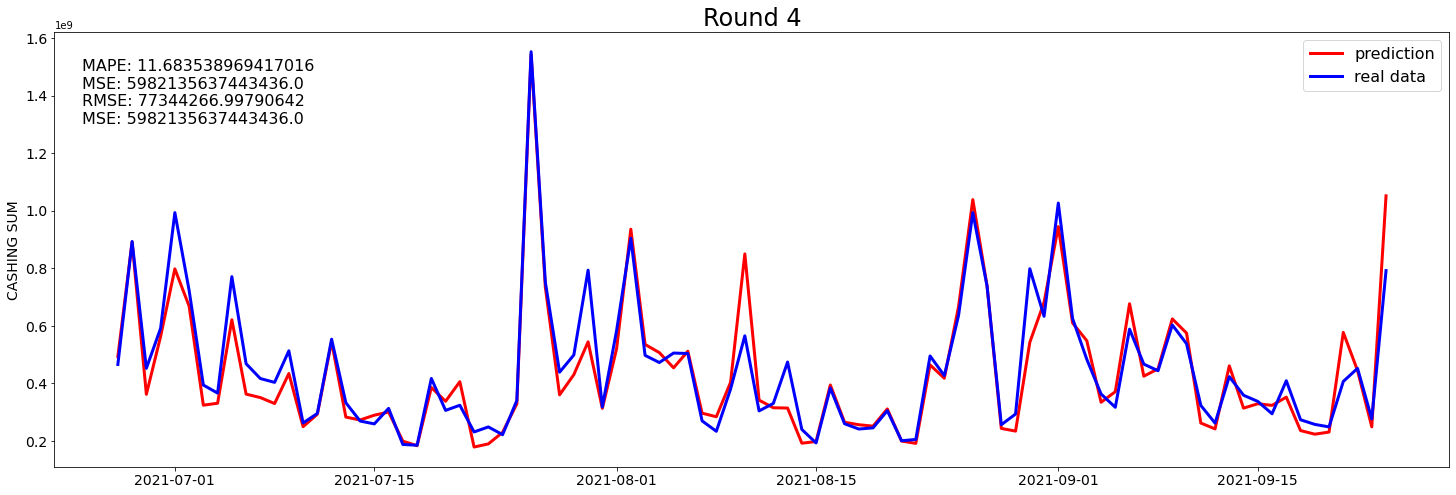

In [9]:
result = pd.DataFrame(pjme_test, columns=['ds', 'CASHING_SUM'])
result['ds'] = result.index

fig = plt.figure(figsize=(25,8))
ax = fig.add_subplot(111)

line1, = ax.plot(result['ds'].values, y_test.values,'r',label='prediction',Linewidth = 3)
line2, = ax.plot(result['ds'].values, df_empty['CASHING_SUM'].values,'b',label = 'real data',Linewidth = 3)
ax.legend(fontsize = 16)
ax.set_ylabel('CASHING SUM', fontsize = 14)

ax.text(0.02, 0.75, "MAPE: {}\nMSE: {}\nRMSE: {}\nMSE: {}\n".format(MAPE[-1],MSE[-1],RMSE[-1],MSE[-1]), 
        transform=ax.transAxes, fontsize = 16)
ax.set_title('Round 4',fontsize=24)
plt.xticks(size = 14)
plt.yticks(size = 14)

## 上述预测的所有feature合并后（df_empty）一起预测CASHING_SUM

In [10]:
X = df_empty.iloc[:, :-1]
X_test = X_test.drop(['holiday'], axis=1)
df_empty = pd.concat([X, X_test, df_empty[['CASHING_SUM']]], axis = 1)

In [11]:
X = pjme_train.iloc[:,:-10]
X_1 = pjme_train.iloc[:,-8:]
pjme_train = pd.concat([X,X_1,pjme_train[['CASHING_SUM']]], axis = 1)

In [12]:
def create_features_filter(df, label=None):
    X = df.iloc[:,0:-15]
    X_1 = df.iloc[:,-11:-1]
    X = pd.concat([X,X_1],axis=1)
    
    if label:
        y = df[label]
        return X, y
    return X

In [13]:
def create_features(df, label=None):
    X = df.iloc[:,0:-1]
    
    if label:
        y = df[label]
        return X, y
    return X

In [14]:
# 训练集
X_train, y_train = create_features(pjme_train, label='CASHING_SUM')
# 测试集
X_test, y_test = create_features(df_empty, label='CASHING_SUM')

# 训练集_filter
X_train_f, y_train_f = create_features_filter(pjme_train, label='CASHING_SUM')
# 测试集_filter
X_test_f, y_test_f = create_features_filter(df_empty, label='CASHING_SUM')

In [15]:
# 模型
reg = xgb.XGBRegressor(n_estimators=1000)
# 训练
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50)


# 预测
y_pred = reg.predict(X_test)

MSE_a = np.mean(np.square(y_test - y_pred))
RMSE_a = np.sqrt(np.mean(np.square(y_test - y_pred)))
MAE_a = np.mean(np.abs(y_test - y_pred))
MAPE_a = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# 模型
reg = xgb.XGBRegressor(n_estimators=1000)
# 训练_filter
reg.fit(X_train_f, y_train_f, eval_set=[(X_train_f, y_train_f), (X_test_f, y_test_f)], early_stopping_rounds=50)
# 预测
y_pred_f = reg.predict(X_test_f)


MSE_f = np.mean(np.square(y_test_f - y_pred_f))
RMSE_f = np.sqrt(np.mean(np.square(y_test_f - y_pred_f)))
MAE_f = np.mean(np.abs(y_test_f - y_pred_f))
MAPE_f = np.mean(np.abs((y_test_f - y_pred_f) / y_test_f)) * 100

<IPython.core.display.Javascript object>

[0]	validation_0-rmse:404364000.00000	validation_1-rmse:367404448.00000
[1]	validation_0-rmse:291651360.00000	validation_1-rmse:266802912.00000
[2]	validation_0-rmse:212842976.00000	validation_1-rmse:203884144.00000
[3]	validation_0-rmse:157701392.00000	validation_1-rmse:165963264.00000
[4]	validation_0-rmse:118822432.00000	validation_1-rmse:135088704.00000
[5]	validation_0-rmse:91588560.00000	validation_1-rmse:117713464.00000
[6]	validation_0-rmse:71228800.00000	validation_1-rmse:103722792.00000
[7]	validation_0-rmse:56668612.00000	validation_1-rmse:93764520.00000
[8]	validation_0-rmse:46511964.00000	validation_1-rmse:86483760.00000
[9]	validation_0-rmse:39501904.00000	validation_1-rmse:82988696.00000
[10]	validation_0-rmse:33984772.00000	validation_1-rmse:79603256.00000
[11]	validation_0-rmse:30230698.00000	validation_1-rmse:78139480.00000
[12]	validation_0-rmse:27095800.00000	validation_1-rmse:76346376.00000
[13]	validation_0-rmse:24677212.00000	validation_1-rmse:75041112.00000
[14]

[117]	validation_0-rmse:280108.62500	validation_1-rmse:69123032.00000
[118]	validation_0-rmse:267334.53125	validation_1-rmse:69125088.00000
[119]	validation_0-rmse:258434.32812	validation_1-rmse:69122552.00000
[120]	validation_0-rmse:239874.46875	validation_1-rmse:69121656.00000
[121]	validation_0-rmse:228484.34375	validation_1-rmse:69118728.00000
[122]	validation_0-rmse:217443.28125	validation_1-rmse:69120688.00000
[123]	validation_0-rmse:207128.39062	validation_1-rmse:69123496.00000
[124]	validation_0-rmse:191551.56250	validation_1-rmse:69127248.00000
[125]	validation_0-rmse:185830.81250	validation_1-rmse:69127752.00000
[126]	validation_0-rmse:182977.12500	validation_1-rmse:69127176.00000
[127]	validation_0-rmse:179533.57812	validation_1-rmse:69127040.00000
[128]	validation_0-rmse:167634.45312	validation_1-rmse:69127656.00000
[129]	validation_0-rmse:165487.25000	validation_1-rmse:69127624.00000
[130]	validation_0-rmse:158301.95312	validation_1-rmse:69126504.00000
[131]	validation_0-r

<IPython.core.display.Javascript object>

[0]	validation_0-rmse:404364000.00000	validation_1-rmse:367404448.00000
[1]	validation_0-rmse:291651360.00000	validation_1-rmse:266802912.00000
[2]	validation_0-rmse:212842976.00000	validation_1-rmse:203884144.00000
[3]	validation_0-rmse:157701392.00000	validation_1-rmse:165963264.00000
[4]	validation_0-rmse:118822432.00000	validation_1-rmse:135088704.00000
[5]	validation_0-rmse:91588560.00000	validation_1-rmse:117713464.00000
[6]	validation_0-rmse:71228800.00000	validation_1-rmse:103722792.00000
[7]	validation_0-rmse:56668612.00000	validation_1-rmse:93764520.00000
[8]	validation_0-rmse:46511964.00000	validation_1-rmse:86483760.00000
[9]	validation_0-rmse:39501904.00000	validation_1-rmse:82988696.00000
[10]	validation_0-rmse:33984772.00000	validation_1-rmse:79603256.00000
[11]	validation_0-rmse:30230698.00000	validation_1-rmse:78139480.00000
[12]	validation_0-rmse:27100126.00000	validation_1-rmse:75993248.00000
[13]	validation_0-rmse:24677330.00000	validation_1-rmse:74689200.00000
[14]

/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/home/u00639/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


(array([0.0e+00, 2.0e+08, 4.0e+08, 6.0e+08, 8.0e+08, 1.0e+09, 1.2e+09,
        1.4e+09, 1.6e+09, 1.8e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

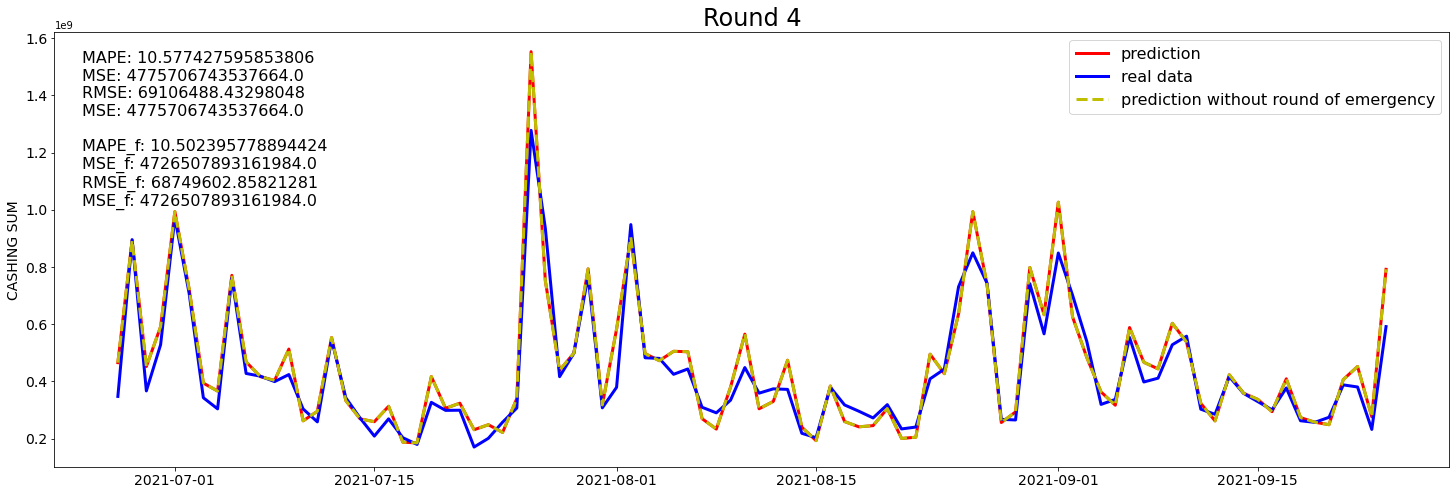

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,8))
ax = fig.add_subplot(111)

line1, = ax.plot(result['ds'].values, y_test,'r',label='prediction',Linewidth = 3)
line2, = ax.plot(result['ds'].values, y_pred,'b',label = 'real data',Linewidth = 3)
line3, = ax.plot(result['ds'].values, y_test_f,'y--',label = 'prediction without round of emergency',Linewidth = 3)
#line4, = ax.plot(result['ds'].values, df_empty['CASHING_SUM'].values,'g',label = 'prediction without round of emergency',Linewidth = 3)
ax.legend(fontsize = 16)
ax.set_ylabel('CASHING SUM', fontsize = 14)

ax.text(0.02, 0.6, "MAPE: {}\nMSE: {}\nRMSE: {}\nMSE: {}\n\nMAPE_f: {}\nMSE_f: {}\nRMSE_f: {}\nMSE_f: {}".format(MAPE_a,MSE_a,RMSE_a,MSE_a,MAPE_f,MSE_f,RMSE_f,MSE_f), 
        transform=ax.transAxes, fontsize = 16)
ax.set_title('Round 4',fontsize=24)
plt.xticks(size = 14)
plt.yticks(size = 14)